In [1]:
## Import Packages
from __future__ import print_function

import numpy as np

#Plotting Packages
import matplotlib as mpl
import matplotlib.cm as cmplt
import matplotlib.pyplot as plt
from matplotlib import rcParams

#I/O
import glob
import copy
import time
import os
import scipy.io as sio
import imageio

from astropy.io import fits

#Plotting Style
%matplotlib inline
plt.style.use('dark_background')
rcParams['text.usetex'] = False
rcParams['axes.titlesize'] = 20
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
rcParams['legend.fontsize'] = 12
rcParams['axes.labelsize'] = 20
rcParams['font.family'] = 'sans-serif'

In [22]:
## imports
import numpy as np
import obd as ob
import imageio
import matplotlib.pyplot as plt
from tqdm import tqdm

In [4]:
def read_fits(filename):
    with fits.open(filename) as hdul:
        data = hdul[0].data
        info = hdul[0].header
        data = data.astype(np.float64)
    return data[380:636,370:626]

def debayer(inpname):

    data = read_fits(inpname)

    # blue channel
    chan_blue = data[::2,::2]

    # red channel
    chan_red = data[1::2,1::2]

    # green channel
    chan_green_temp = np.zeros((int(data.shape[0]/2),data.shape[1]))
    for i in range(data.shape[1]):
        if ((i % 2) == 0):
            chan_green_temp[:,i] = data[1::2,i]
        else:
            chan_green_temp[:,i] = data[::2,i]
    chan_green = 0.5*(chan_green_temp[:,::2] + chan_green_temp[:,1::2])

    # construct image array
    im = np.zeros((chan_blue.shape[0],chan_blue.shape[1],3))
    im[:,:,0] = chan_red
    im[:,:,1] = chan_green
    im[:,:,2] = chan_blue

    return im

In [3]:
base = '/Users/saydjari/Dropbox/GradSchool_AKS/Doug/ExtData/HOP/2021_02_25/'
directory = 'TIC_72090501.01/2021-02-26_00_56_38Z/'

In [7]:
i=10
rgb_im = debayer(base+directory+'2021-02-26-0056_6-CapObj_{:0>4d}.FIT'.format(i))

[]

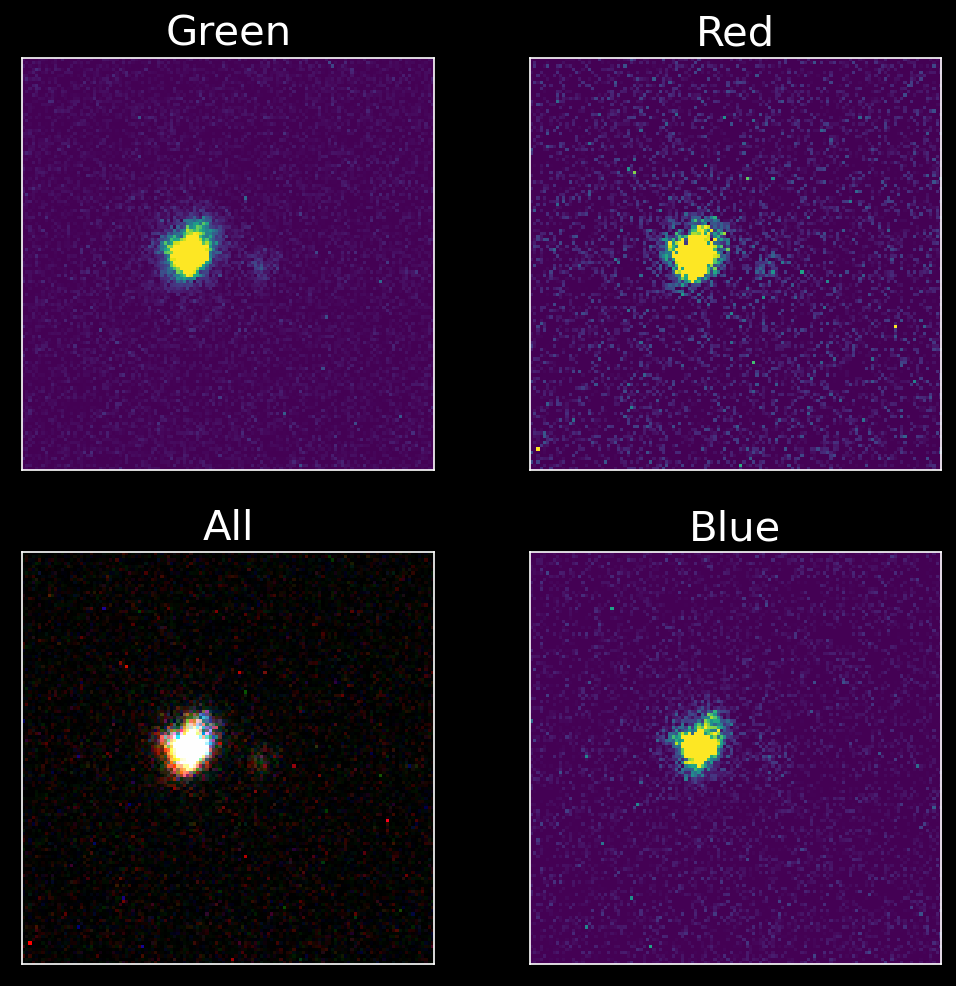

In [20]:
fig = plt.figure(figsize=(8,8),dpi=150)

ax = fig.add_subplot(2,2,1)
plt.title("Green")
im = plt.imshow(rgb_im[:,:,1])
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])

ax = fig.add_subplot(2,2,2)
plt.title("Red")
im = plt.imshow(rgb_im[:,:,0])
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])


ax = fig.add_subplot(2,2,4)
plt.title("Blue")
im = plt.imshow(rgb_im[:,:,2])
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])

ax = fig.add_subplot(2,2,3)
plt.title("All")
im = plt.imshow(rgb_im/65535)
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])

In [40]:
ob.obd

<function obd.obd(x, y, sf, maxiter)>

  0%|          | 0/20 [00:00<?, ?it/s]

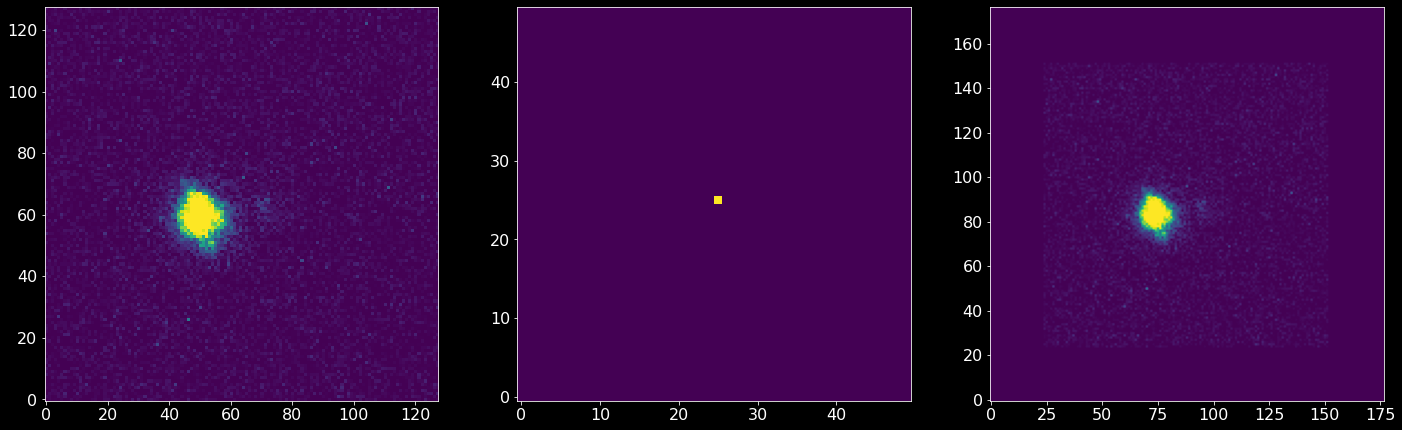

  5%|▌         | 1/20 [00:00<00:06,  2.72it/s]

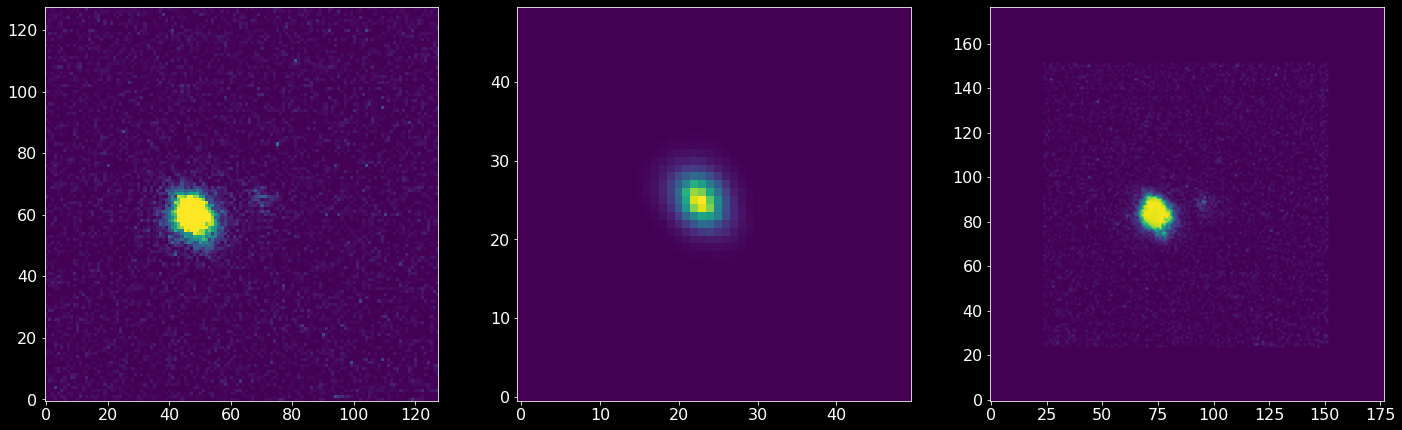

 10%|█         | 2/20 [00:01<00:15,  1.17it/s]

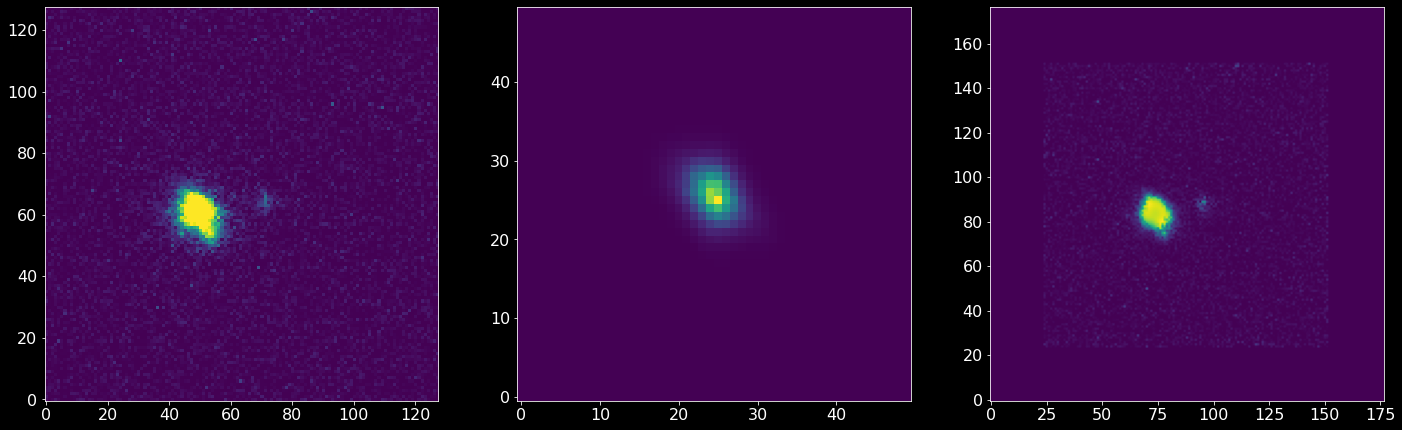

 15%|█▌        | 3/20 [00:02<00:17,  1.04s/it]

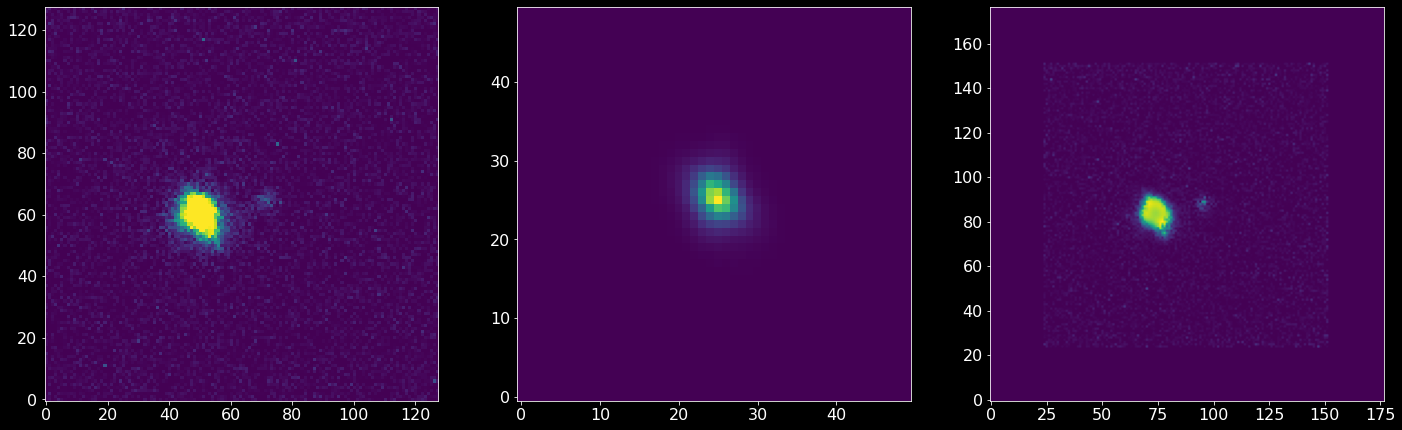

 20%|██        | 4/20 [00:04<00:19,  1.20s/it]

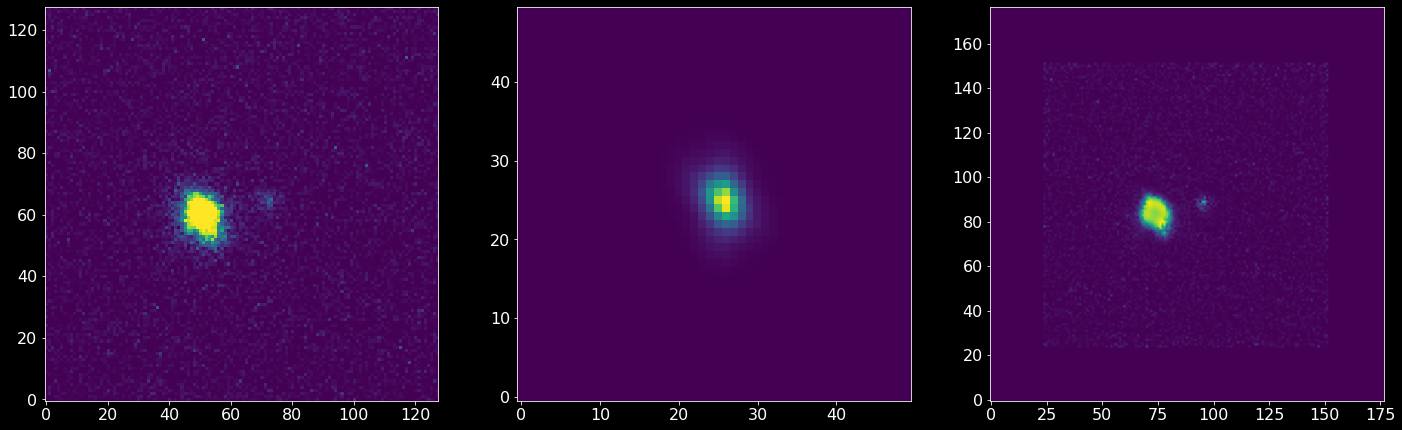

 25%|██▌       | 5/20 [00:05<00:18,  1.23s/it]

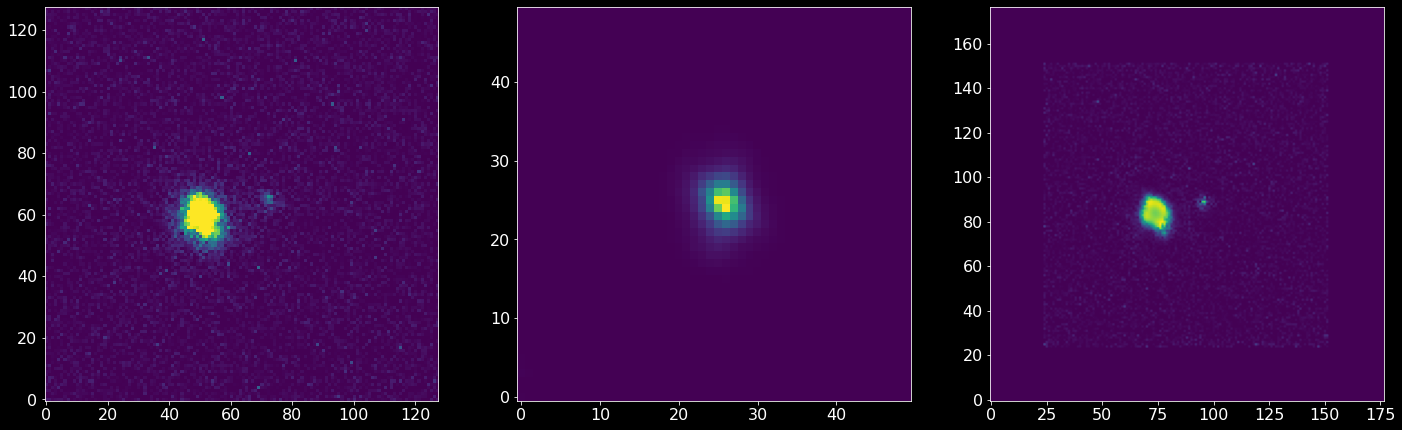

 30%|███       | 6/20 [00:06<00:17,  1.22s/it]

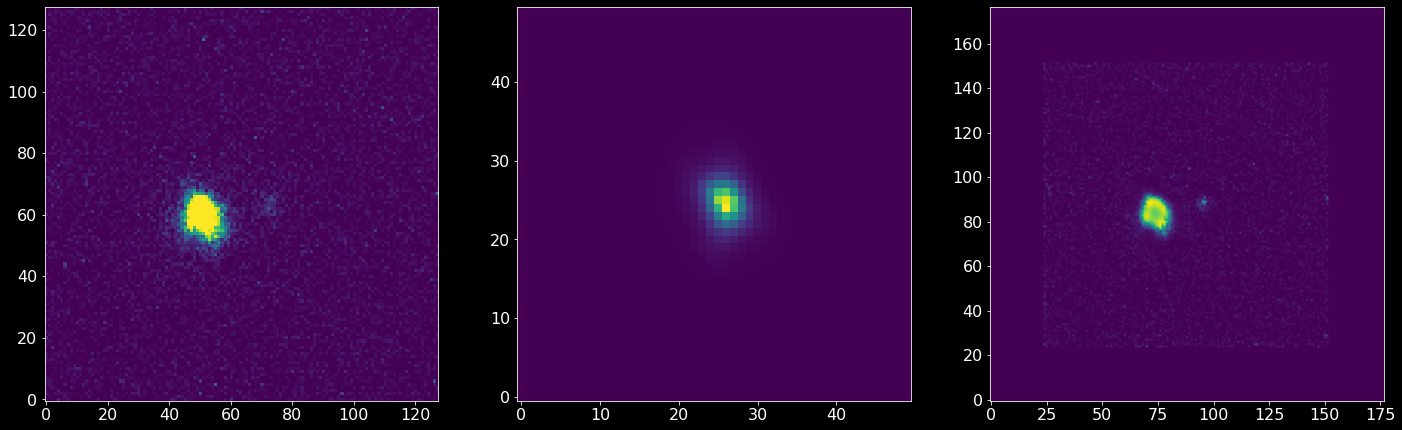

 35%|███▌      | 7/20 [00:07<00:15,  1.21s/it]

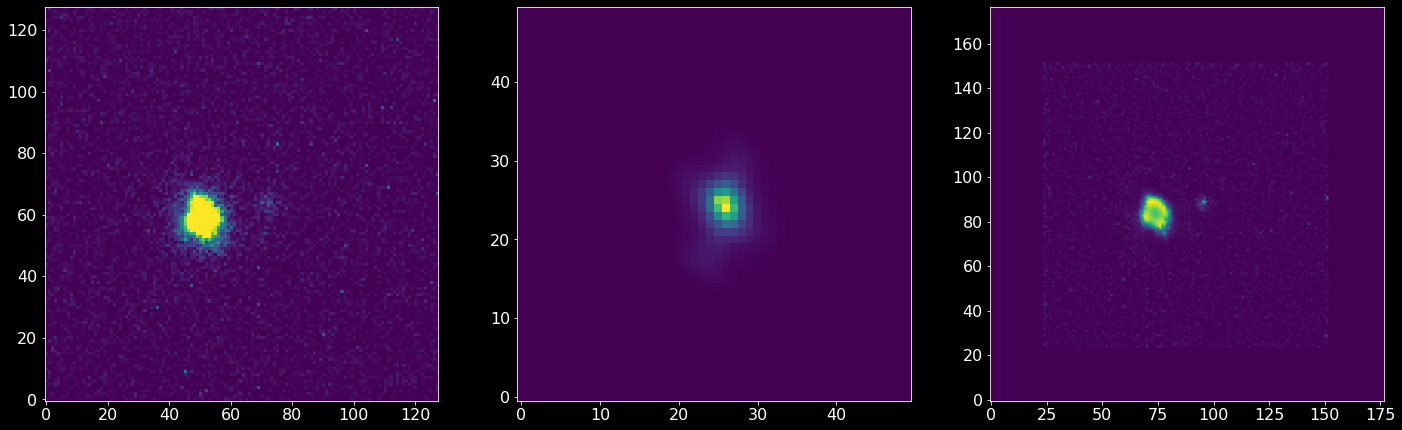

 40%|████      | 8/20 [00:09<00:14,  1.20s/it]

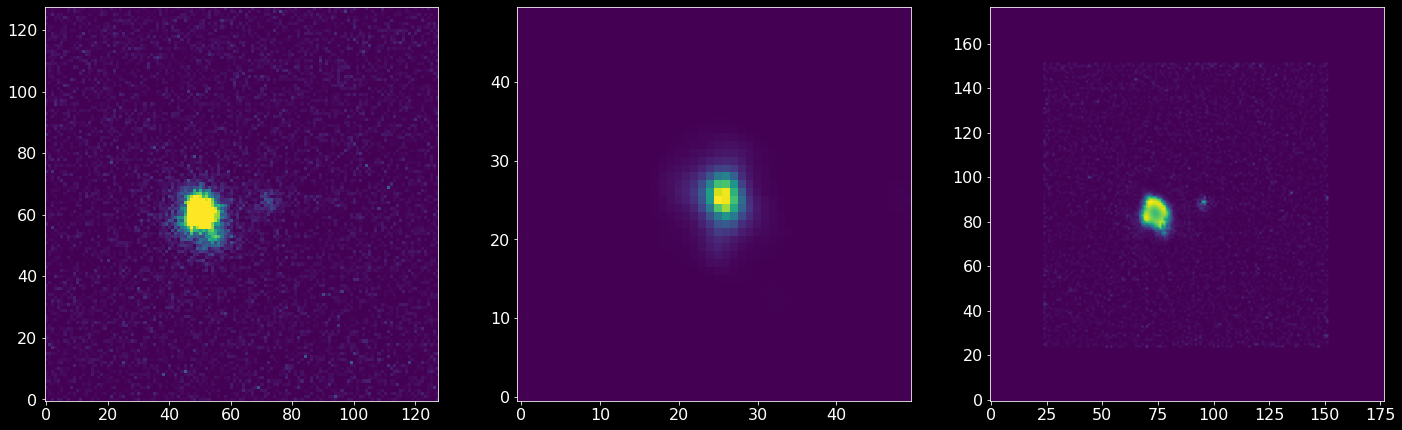

 45%|████▌     | 9/20 [00:10<00:13,  1.20s/it]

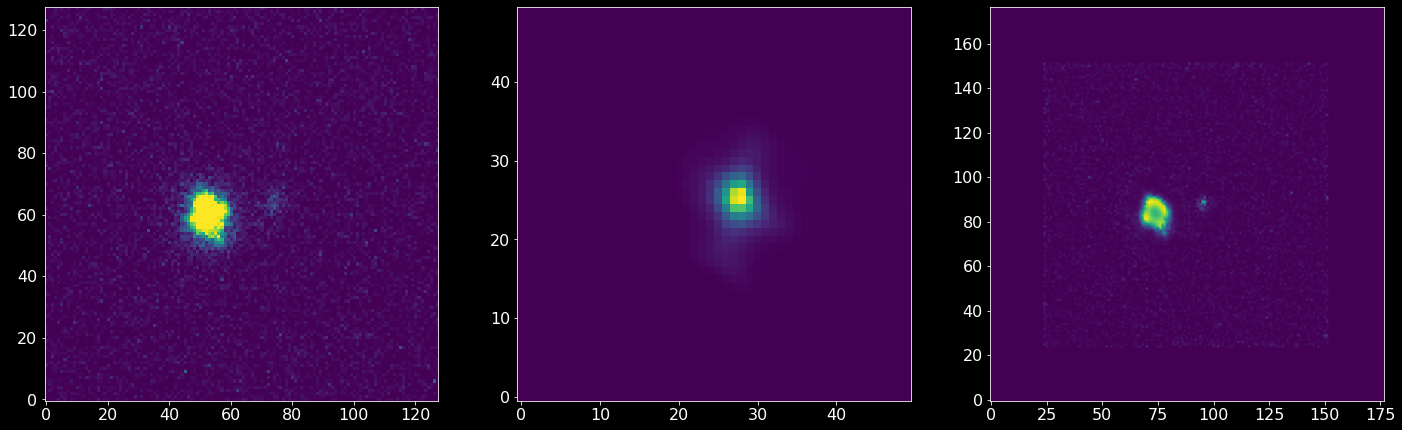

 50%|█████     | 10/20 [00:11<00:11,  1.19s/it]

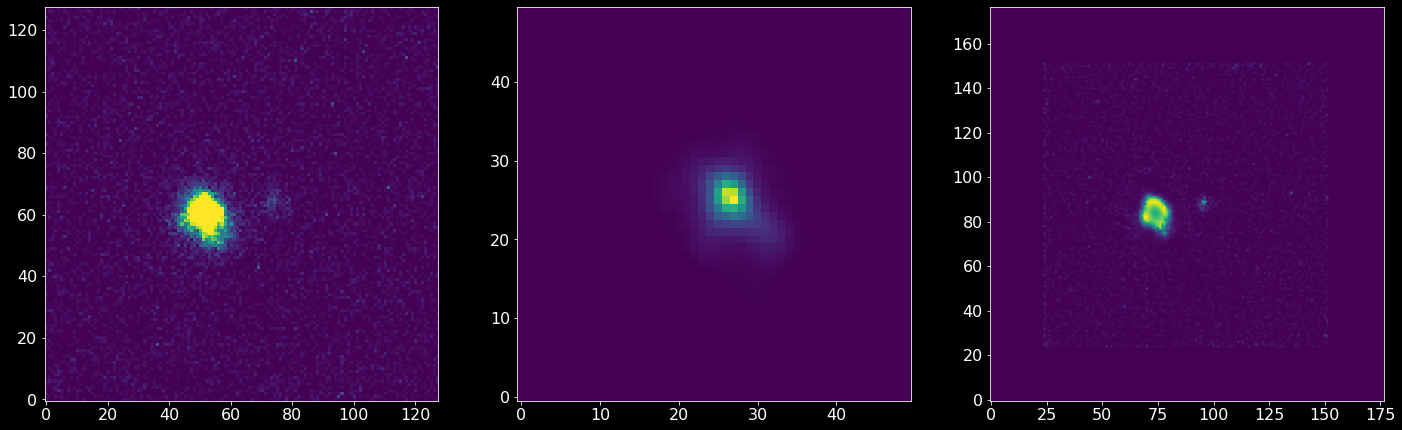

 55%|█████▌    | 11/20 [00:12<00:10,  1.20s/it]

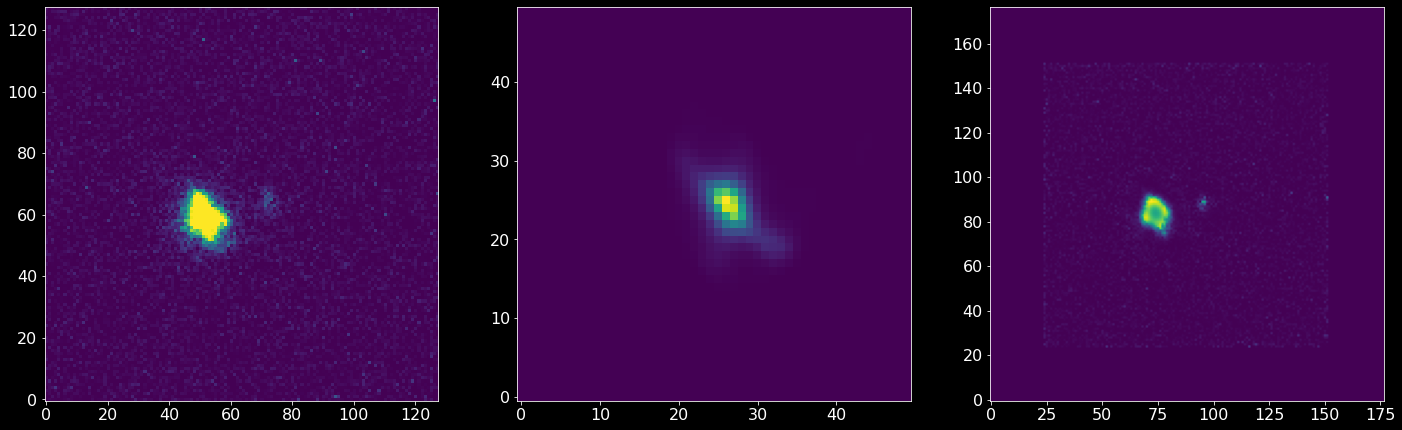

 60%|██████    | 12/20 [00:13<00:09,  1.20s/it]

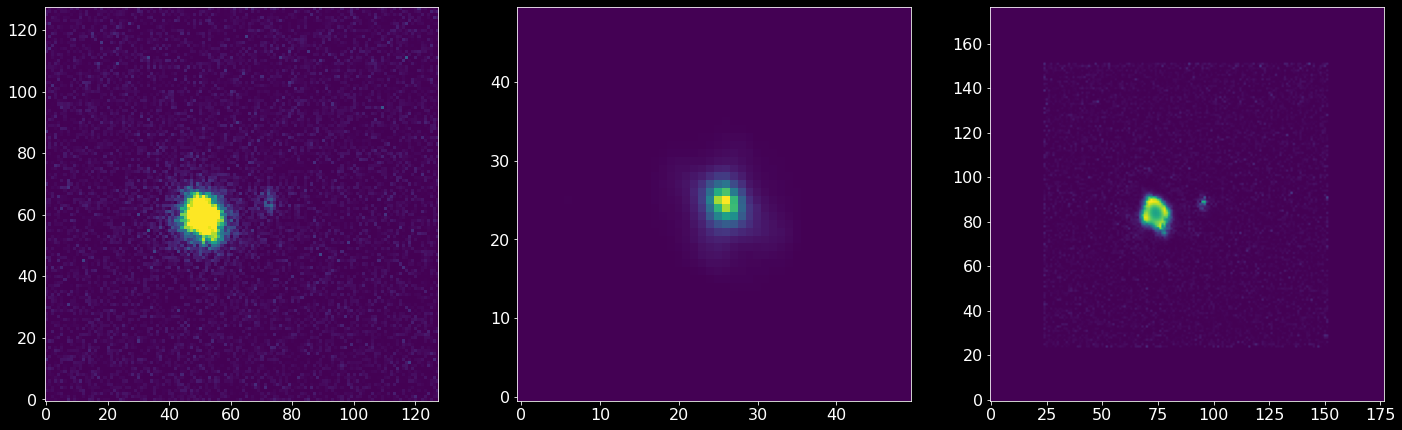

 65%|██████▌   | 13/20 [00:15<00:08,  1.24s/it]

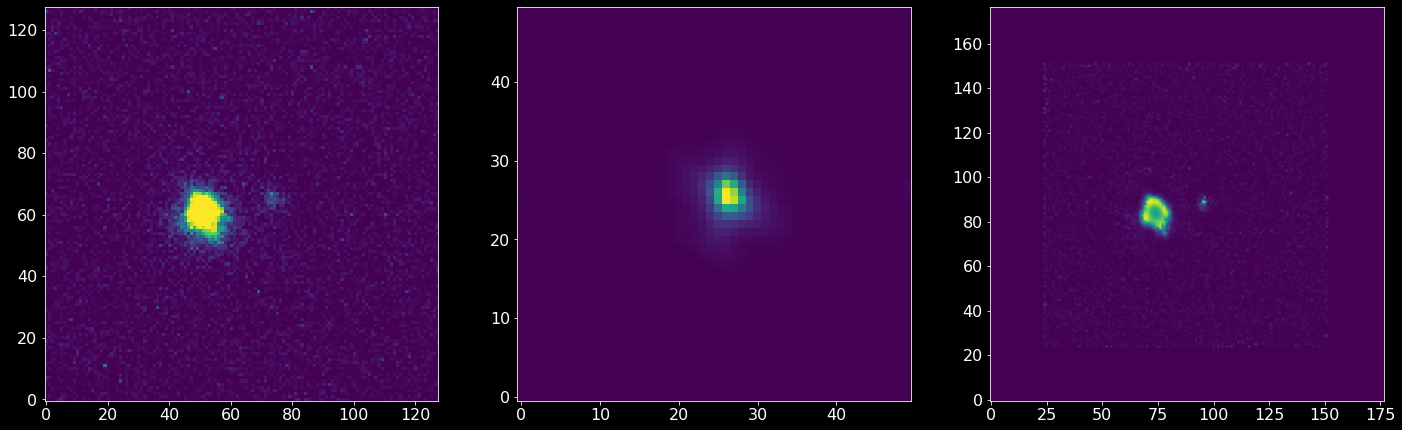

 70%|███████   | 14/20 [00:16<00:07,  1.22s/it]

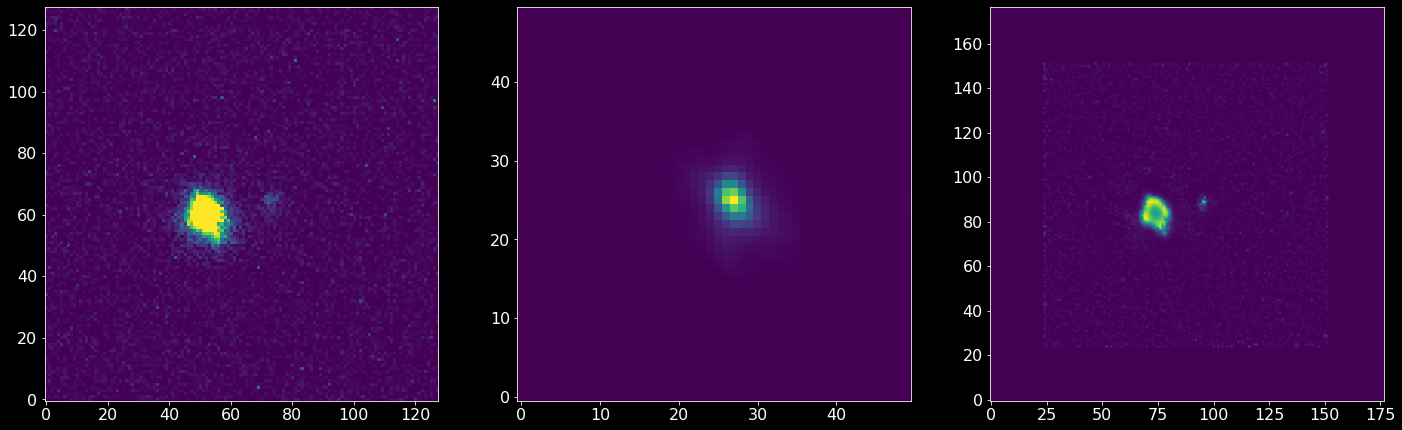

 75%|███████▌  | 15/20 [00:17<00:06,  1.22s/it]

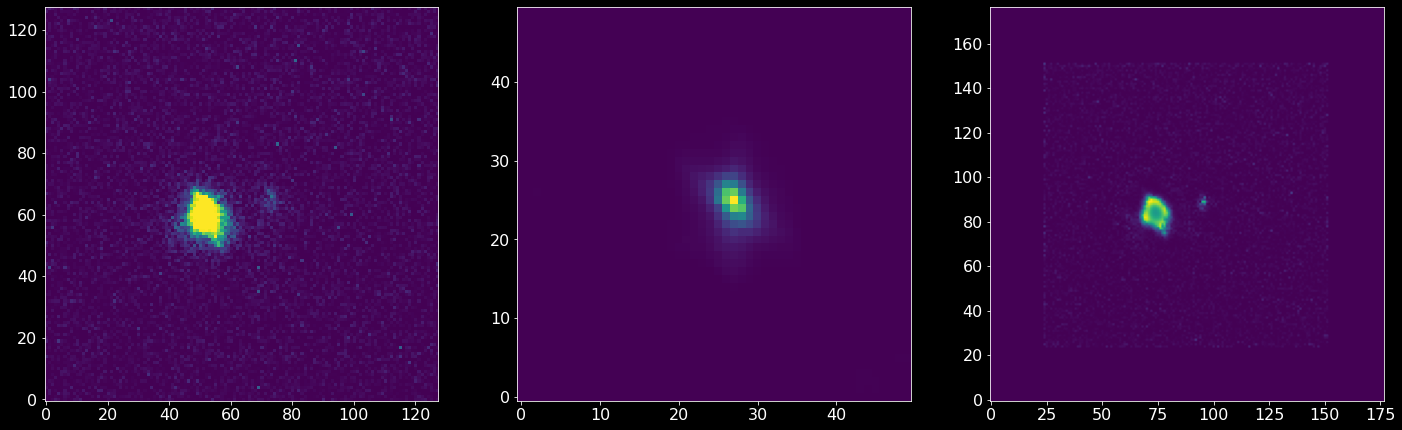

 80%|████████  | 16/20 [00:18<00:04,  1.20s/it]

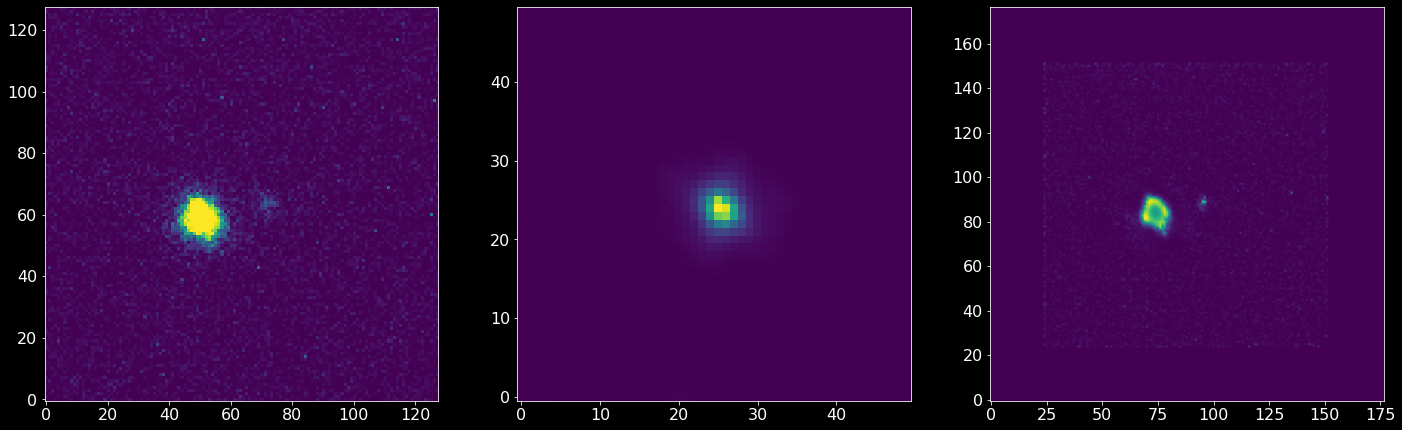

 85%|████████▌ | 17/20 [00:19<00:03,  1.20s/it]

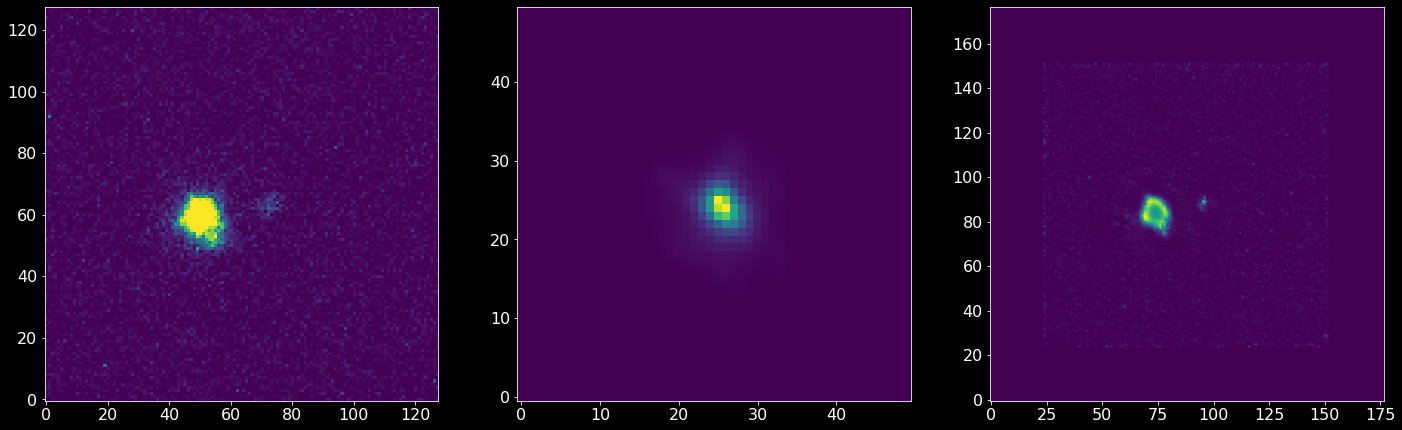

 90%|█████████ | 18/20 [00:21<00:02,  1.19s/it]

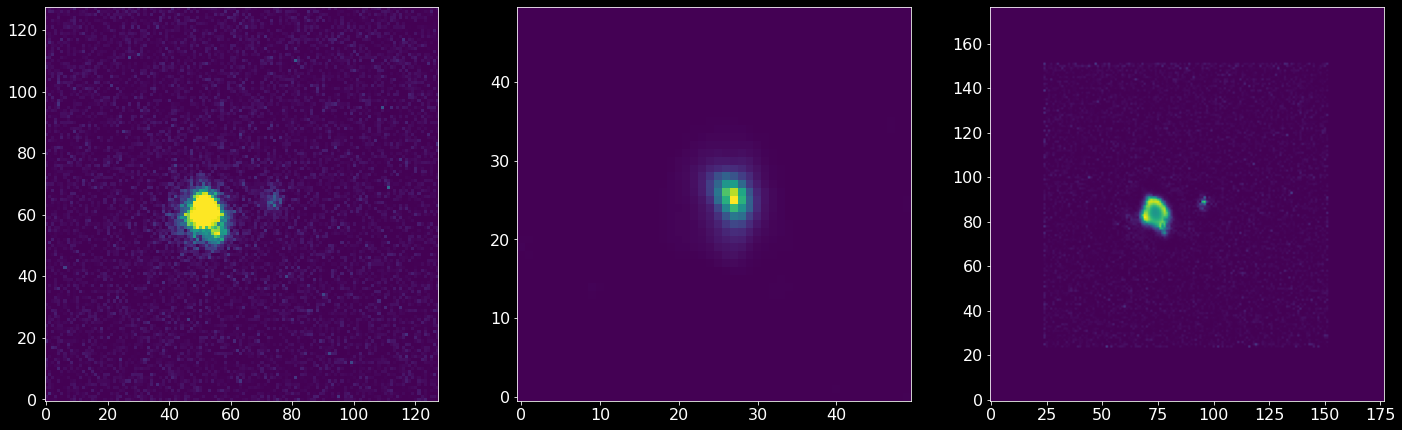

 95%|█████████▌| 19/20 [00:22<00:01,  1.21s/it]

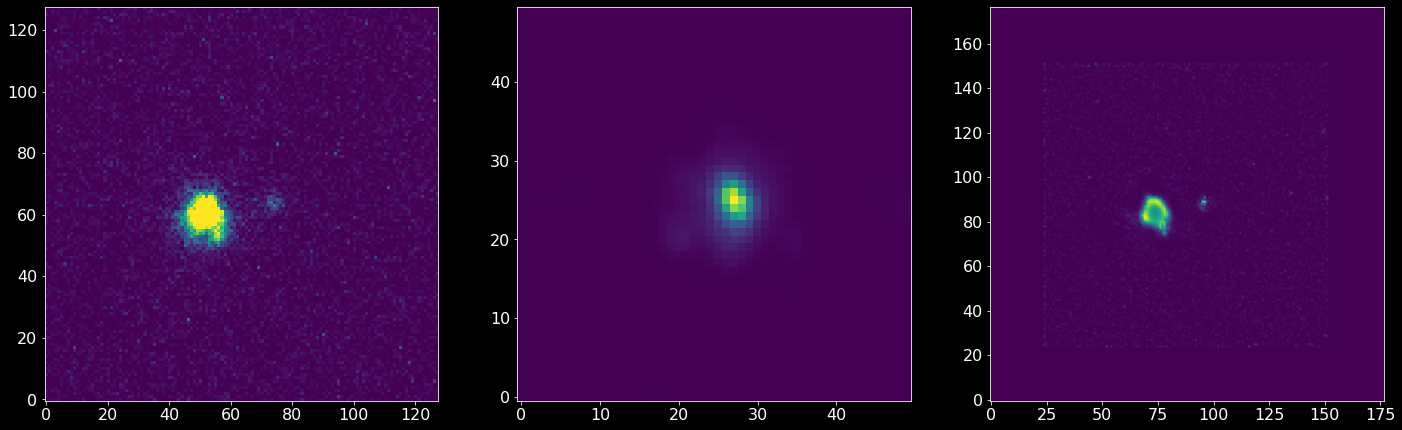

100%|██████████| 20/20 [00:23<00:00,  1.19s/it]


In [30]:
## parameters
sf = np.array([50, 50])       # size of the PSF
maxiter = [40, 1]    # number of iterations for f and x
n = 20              # number of images
clipping = np.inf      # maximally acceptable pixel (for saturation correction)
srf = 1.0           # superresolution factor

base = '/Users/saydjari/Dropbox/GradSchool_AKS/Doug/ExtData/HOP/2021_02_25/'
directory = 'TIC_72090501.01/2021-02-26_00_56_38Z/'

# intially there is no x
flux_x = []
flux_y = []
flux_f = []
x = np.array([])
for j in tqdm(range(0,n)):
    y = debayer(base+directory+'2021-02-26-0056_6-CapObj_{:0>4d}.FIT'.format(j))[:,:,1]
    x, f = ob.obd(x, y, sf, maxiter)
    fig, ax = plt.subplots(1,3, figsize=(24., 8.))
    ax[0].imshow(y, origin='lower')
    ax[1].imshow(f, origin='lower')
    ax[2].imshow(x, origin='lower')
    flux_x.append(np.sum(x))
    flux_f.append(np.sum(f))
    flux_y.append(np.sum(y))
    plt.show()

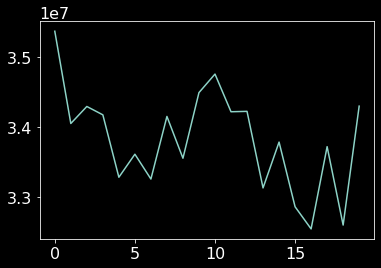

In [31]:
plt.plot(flux_x)

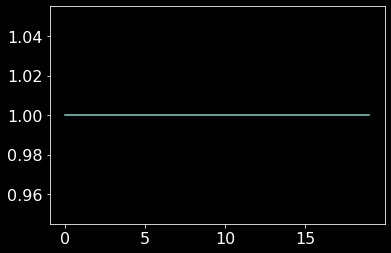

In [32]:
plt.plot(flux_f)

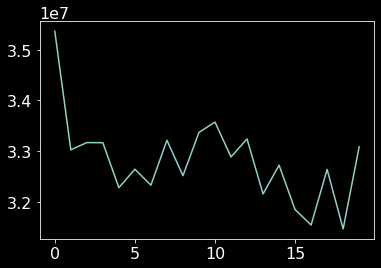

In [34]:
plt.plot(flux_y)

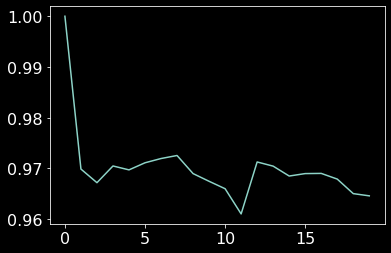

In [39]:
plt.plot(np.divide(np.array(flux_y),np.array(flux_x)))

In [55]:
def obd(x,y,sf,maxiter):
    # x is estimate of deblurred image
    # y is observed image
    # sf size of psf
    # max iters for gradient descent

    # we will stay consistent with the notation to keep f as the psf
    sx = np.array(np.shape(x))
    sy = np.array(np.shape(y))
    
    ### Update/Guess the PSF

    #if there is already a guess for x, use it to guess f
    if sx[0] != 0:
        # starting flux in x 
        sumx = np.sum(x)
        
        # initialize PSF as flat w/ correct intensity
        f = np.linalg.norm(np.ndarray.flatten(y)) / np.linalg.norm(np.ndarray.flatten(x))
        f = f * np.ones(sf) / np.sqrt(np.prod(sf, axis=0))

        #lets do GD on f given x and y
        #obd update(f,x,y)
        for i in range(0,maxiter[0]):
            #I am everywhere here making assumptions about sx,sf,and sy.
            #Just let me do that a minute please.
            ytmp = np.multiply(np.fft.fft2(x,s=sx), np.fft.fft2(f, s=sx))
            ytmp = setZero(np.real(np.fft.ifft2(ytmp)))[sf[0]-1:,sf[1]-1:] #so they do not seem to do the np.real here... what does pos mean in that case?

            Y = np.zeros(sx)
            Y[sf[0]-1:,sf[1]-1:] = y
            num = np.multiply(np.conj(np.fft.fft2(x,s=sx)),np.fft.fft2(Y,s=sx))
            num = setZero(np.real(np.fft.ifft2(num)))[:sf[0],:sf[0]]

            Y = np.zeros(sx) #,dtype=np.complex64)
            Y[sf[0]-1:,sf[1]-1:] = ytmp
            denom = np.multiply(np.conj(np.fft.fft2(x,s=sx)),np.fft.fft2(Y,s=sx))
            denom = setZero(np.real(np.fft.ifft2(denom)))[:sf[0],:sf[0]]

            tol = 1e-10
            factor = np.divide((num+tol),(denom+tol))
            f = np.multiply(f, factor)

        #this normalization seem suspect for making the light curve
        sumf = np.sum(f)
        f = f/sumf # normalize f
        x = sumf*x # adjust x as well
        #so this is shifting all the power from f to x
        #f is always unit normalized
        #now we guess the structure of x given y and that we have
        #renormalized x to have the same power as y
        ## actually we are normalizing by abs(image) not image
        ## power. This makes me feel uncomfortable.

    #now that we have good guess for f, use it to guess x given y
        #lets do GD on x given f and y
        #obd update(x,f,y)
        for i in range(0,maxiter[1]):
            #I am everywhere here making assumptions about sx,sf,and sy.
            #Just let me do that a minute please.
            ytmp = np.multiply(np.fft.fft2(x,s=sx), np.fft.fft2(f, s=sx))
            ytmp = setZero(np.real(np.fft.ifft2(ytmp)))[sf[0]-1:,sf[1]-1:] #so they do not seem to do the np.real here... what does pos mean in that case?

            Y = np.zeros(sx)
            Y[sf[0]-1:,sf[1]-1:] = y
            num = np.multiply(np.conj(np.fft.fft2(f,s=sx)),np.fft.fft2(Y,s=sx))
            num = setZero(np.real(np.fft.ifft2(num)))

            Y = np.zeros(sx) #,dtype=np.complex64)
            Y[sf[0]-1:,sf[1]-1:] = ytmp
            denom = np.multiply(np.conj(np.fft.fft2(f,s=sx)),np.fft.fft2(Y,s=sx))
            denom = setZero(np.real(np.fft.ifft2(denom)))

            tol = 1e-10
            factor = np.divide((num+tol),(denom+tol))
            x = np.multiply(x, factor)
            
        sumy = np.sum(y)
        sumx = np.sum(x)
#         avg = np.mean((sumx,sumy))
#         x = avg/sumx*x
        x = sumy/sumx*x

        return x, f

    #intialization of f from scratch
    else:
        f = np.zeros(sf)
        mid = int(f.shape[0]/2)
        f[mid,mid] = 1 #delta function intialization
        # make the guess for x to be size of sy padded by sf

    #using our intialization of f, use it to guess x given y
        ## here I am assuming sf<sy
        sx = sf + sy - 1
        Y = np.zeros(sx)
        Y[sf[0]-1:,sf[1]-1:] = y
        x = np.multiply(np.conj(np.fft.fft2(f,s=sx)),np.fft.fft2(Y,s=sx))
        x = setZero(np.real(np.fft.ifft2(x)))
        ## to be clear, this is a waste of time, beacuse we know we are choosing x=y1
        ## that is what the delta function means.
        ## This was useful coding practice because it means the image is centered using my conventions
        ## need to understand why this padding is really necessary
        ## these lines may be useful for srf cases which we are ignoring rn
        sumy = np.sum(y)
        sumx = np.sum(x)
        x = sumy/sumx*x
        return x, f

# function that converts all negative elements to zero
def setZero(x):
    x[x<0] = 0
    return x

100%|██████████| 100/100 [01:26<00:00,  1.15it/s]


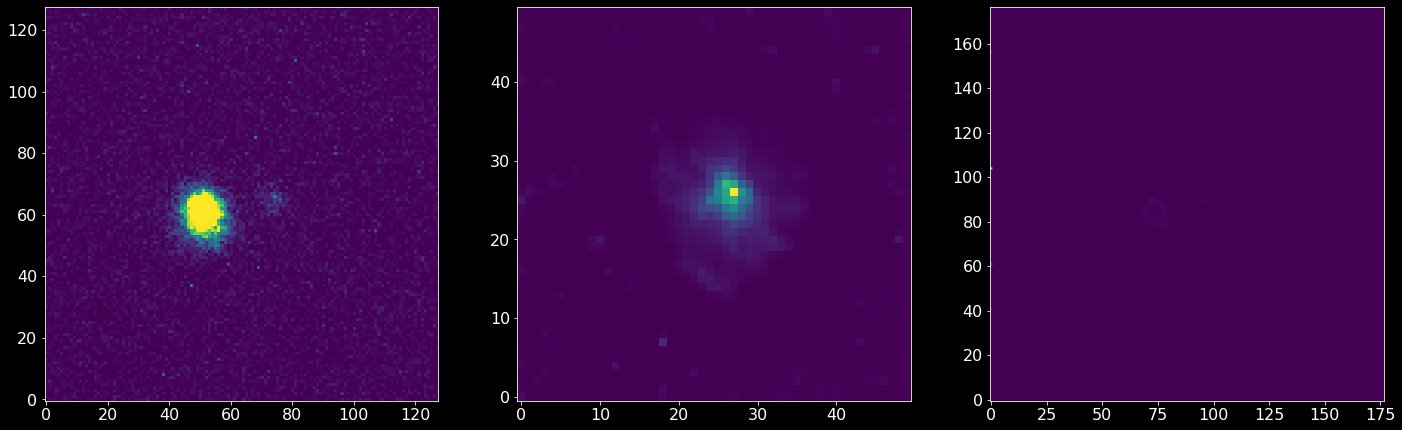

In [60]:
## parameters
sf = np.array([50, 50])       # size of the PSF
maxiter = [40, 1]    # number of iterations for f and x
n = 100              # number of images
clipping = np.inf      # maximally acceptable pixel (for saturation correction)
srf = 1.0           # superresolution factor

base = '/Users/saydjari/Dropbox/GradSchool_AKS/Doug/ExtData/HOP/2021_02_25/'
directory = 'TIC_72090501.01/2021-02-26_00_56_38Z/'

# intially there is no x
flux_x = []
flux_y = []
flux_f = []
x = np.array([])
for j in tqdm(range(0,n)):
    y = debayer(base+directory+'2021-02-26-0056_6-CapObj_{:0>4d}.FIT'.format(j))[:,:,1]
    x, f = obd(x, y, sf, maxiter)
#     fig, ax = plt.subplots(1,3, figsize=(24., 8.))
#     ax[0].imshow(y, origin='lower')
#     ax[1].imshow(f, origin='lower')
#     ax[2].imshow(x, origin='lower')
#     plt.show()
    flux_x.append(np.sum(x))
    flux_f.append(np.sum(f))
    flux_y.append(np.sum(y))
    
sumy = np.mean(flux_y)
sumx = np.mean(x)
x = sumy/sumx*x

fig, ax = plt.subplots(1,3, figsize=(24., 8.))
ax[0].imshow(y, origin='lower')
ax[1].imshow(f, origin='lower')
ax[2].imshow(x, origin='lower')
plt.show()

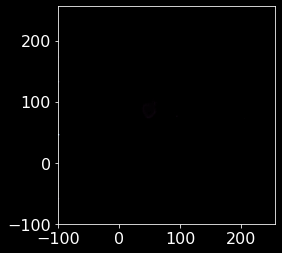

In [65]:
plt.imshow(x,extent=(-100,256,-100,256),cmap='cubehelix')

In [83]:
meshx, meshy = np.meshgrid(np.arange(1,177),np.arange(1,177))
meshx.flatten()[np.argmax(x)],meshy.flatten()[np.argmax(x)]

(105, 105)

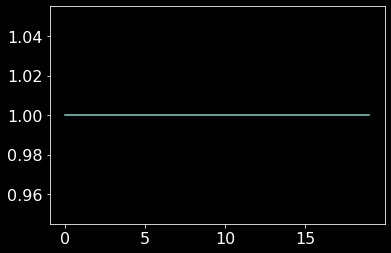

In [57]:
plt.plot(np.divide(np.array(flux_y),np.array(flux_x)))

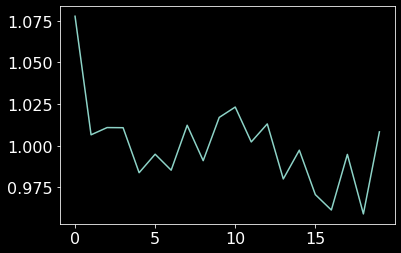

In [58]:
plt.plot(flux_y/np.mean(flux_y))

In [91]:
def obd(x,y,sf,maxiter,clipping):
    # x is estimate of deblurred image
    # y is observed image
    # sf size of psf
    # max iters for gradient descent
    # clipping, max value indicating sat detector

    # we will stay consistent with the notation to keep f as the psf
    sx = np.array(np.shape(x))
    sy = np.array(np.shape(y))
    
    # starting flux in y
    sumy = np.sum(y)
    
    ### Update/Guess the PSF

    #if there is already a guess for x, use it to guess f
    if sx[0] != 0:
        # starting flux in x 
        sumx = np.sum(x)
        
        # mask out sat pixels in y
        mask = y>=clipping
        y[mask] = 0
        
        # initialize PSF as flat w/ correct intensity
        f = np.linalg.norm(np.ndarray.flatten(y)) / np.linalg.norm(np.ndarray.flatten(x))
        f = f * np.ones(sf) / np.sqrt(np.prod(sf, axis=0))

        #lets do GD on f given x and y
        #obd update(f,x,y)
        for i in range(0,maxiter[0]):
            #I am everywhere here making assumptions about sx,sf,and sy.
            #Just let me do that a minute please.
            ytmp = np.multiply(np.fft.fft2(x,s=sx), np.fft.fft2(f, s=sx))
            ytmp = setZero(np.real(np.fft.ifft2(ytmp)))[sf[0]-1:,sf[1]-1:] #so they do not seem to do the np.real here... what does pos mean in that case?
            ytmp[mask] = 0
            
            Y = np.zeros(sx)
            Y[sf[0]-1:,sf[1]-1:] = y
            num = np.multiply(np.conj(np.fft.fft2(x,s=sx)),np.fft.fft2(Y,s=sx))
            num = setZero(np.real(np.fft.ifft2(num)))[:sf[0],:sf[0]]

            Y = np.zeros(sx) #,dtype=np.complex64)
            Y[sf[0]-1:,sf[1]-1:] = ytmp
            denom = np.multiply(np.conj(np.fft.fft2(x,s=sx)),np.fft.fft2(Y,s=sx))
            denom = setZero(np.real(np.fft.ifft2(denom)))[:sf[0],:sf[0]]

            tol = 1e-10
            factor = np.divide((num+tol),(denom+tol))
            f = np.multiply(f, factor)

        #this normalization seem suspect for making the light curve
        sumf = np.sum(f)
        f = f/sumf # normalize f
        x = sumf*x # adjust x as well
        #so this is shifting all the power from f to x
        #f is always unit normalized
        #now we guess the structure of x given y and that we have
        #renormalized x to have the same power as y
        ## actually we are normalizing by abs(image) not image
        ## power. This makes me feel uncomfortable.

    #now that we have good guess for f, use it to guess x given y
        #lets do GD on x given f and y
        #obd update(x,f,y)
        for i in range(0,maxiter[1]):
            #I am everywhere here making assumptions about sx,sf,and sy.
            #Just let me do that a minute please.
            ytmp = np.multiply(np.fft.fft2(x,s=sx), np.fft.fft2(f, s=sx))
            ytmp = setZero(np.real(np.fft.ifft2(ytmp)))[sf[0]-1:,sf[1]-1:] #so they do not seem to do the np.real here... what does pos mean in that case?
            ytmp[mask] = 0
            
            Y = np.zeros(sx)
            Y[sf[0]-1:,sf[1]-1:] = y
            num = np.multiply(np.conj(np.fft.fft2(f,s=sx)),np.fft.fft2(Y,s=sx))
            num = setZero(np.real(np.fft.ifft2(num)))

            Y = np.zeros(sx) #,dtype=np.complex64)
            Y[sf[0]-1:,sf[1]-1:] = ytmp
            denom = np.multiply(np.conj(np.fft.fft2(f,s=sx)),np.fft.fft2(Y,s=sx))
            denom = setZero(np.real(np.fft.ifft2(denom)))

            tol = 1e-10
            factor = np.divide((num+tol),(denom+tol))
            x = np.multiply(x, factor)
        
        sumx = np.sum(x)
#         avg = np.mean((sumx,sumy))
#         x = avg/sumx*x
        x = sumy/sumx*x

        return x, f

    #intialization of f from scratch
    else:
        f = np.zeros(sf)
        mid = int(f.shape[0]/2)
        f[mid,mid] = 1 #delta function intialization
        # make the guess for x to be size of sy padded by sf

    #using our intialization of f, use it to guess x given y
        ## here I am assuming sf<sy
        sx = sf + sy - 1
        Y = np.zeros(sx)
        Y[sf[0]-1:,sf[1]-1:] = y
        x = np.multiply(np.conj(np.fft.fft2(f,s=sx)),np.fft.fft2(Y,s=sx))
        x = setZero(np.real(np.fft.ifft2(x)))
        ## to be clear, this is a waste of time, beacuse we know we are choosing x=y1
        ## that is what the delta function means.
        ## This was useful coding practice because it means the image is centered using my conventions
        ## need to understand why this padding is really necessary
        ## these lines may be useful for srf cases which we are ignoring rn
        sumx = np.sum(x)
        x = sumy/sumx*x
        return x, f

# function that converts all negative elements to zero
def setZero(x):
    x[x<0] = 0
    return x

  0%|          | 0/20 [00:00<?, ?it/s]

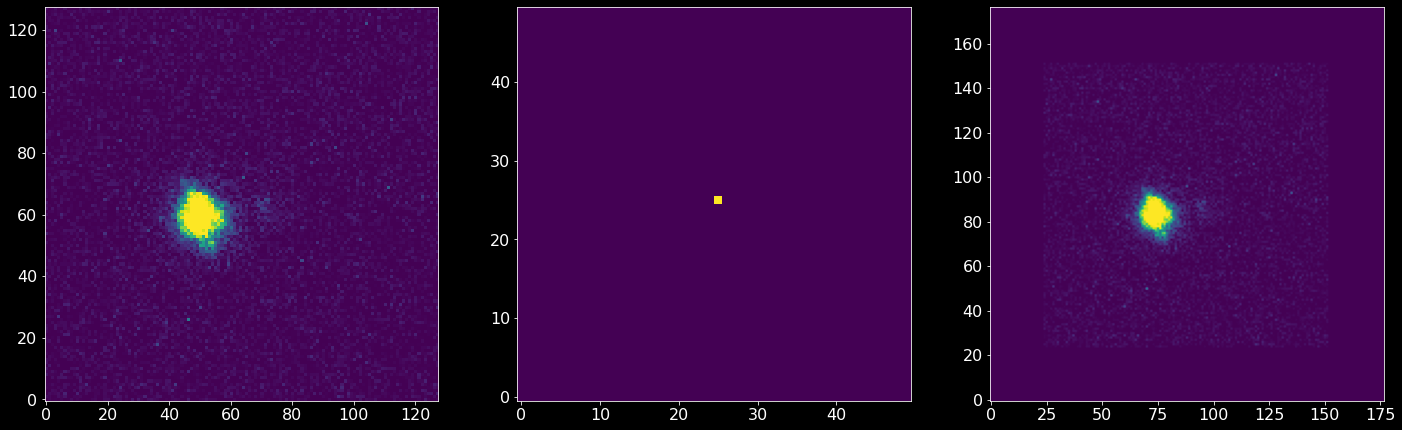

  5%|▌         | 1/20 [00:00<00:07,  2.63it/s]

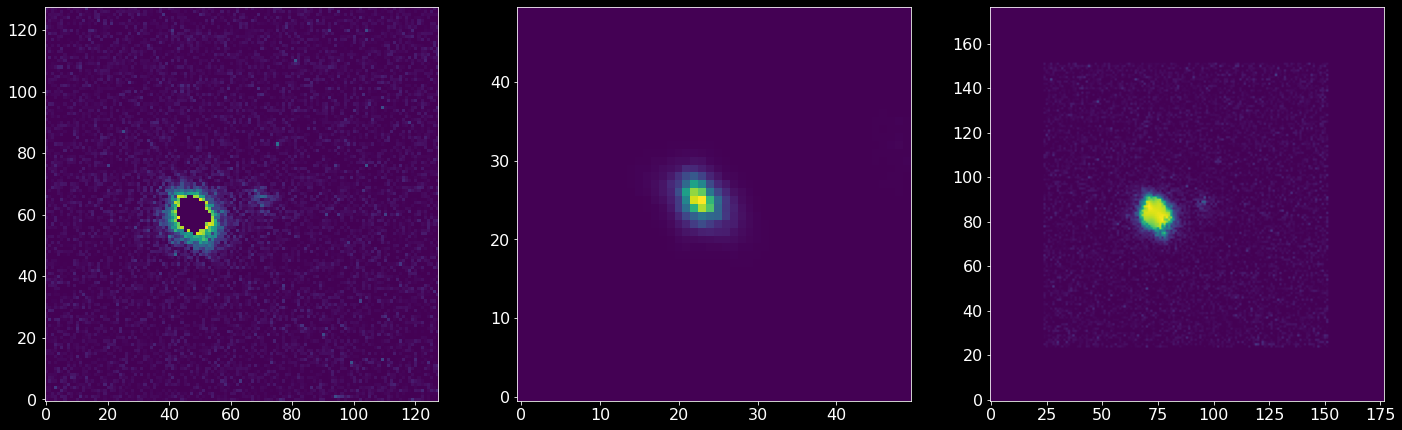

 10%|█         | 2/20 [00:01<00:18,  1.00s/it]

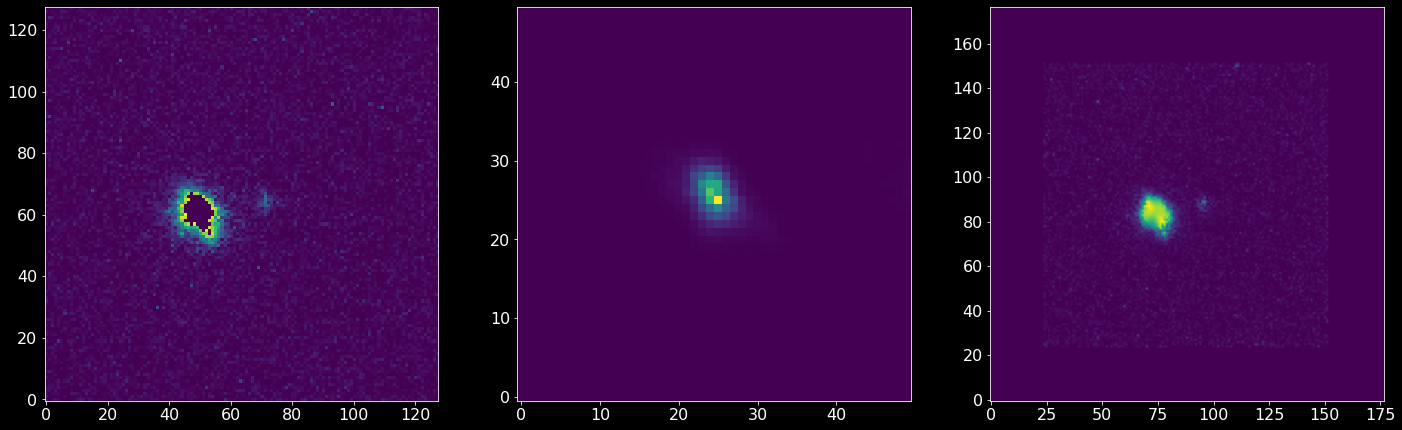

 15%|█▌        | 3/20 [00:03<00:18,  1.10s/it]

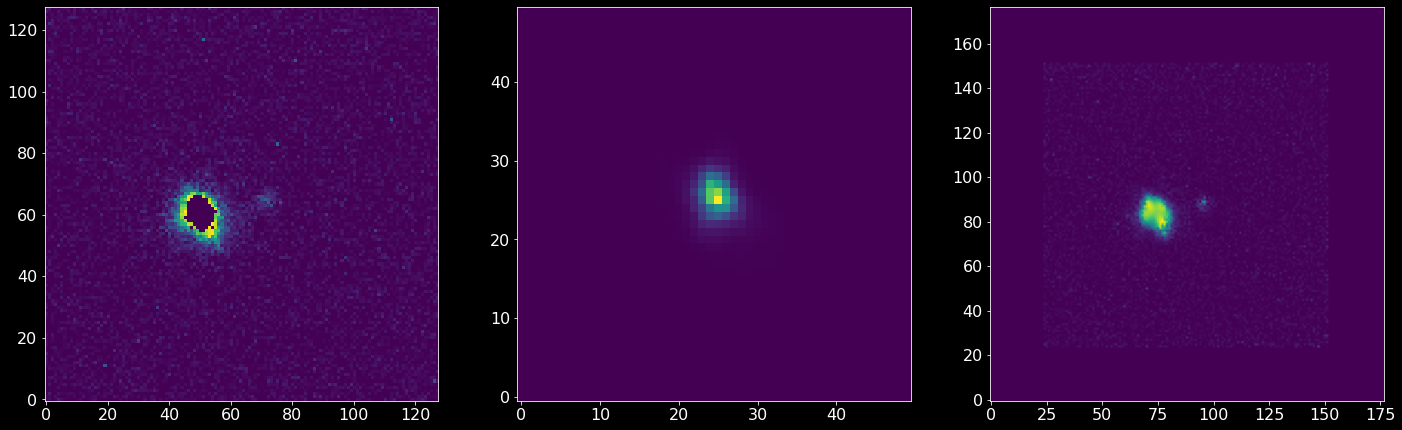

 20%|██        | 4/20 [00:04<00:18,  1.14s/it]

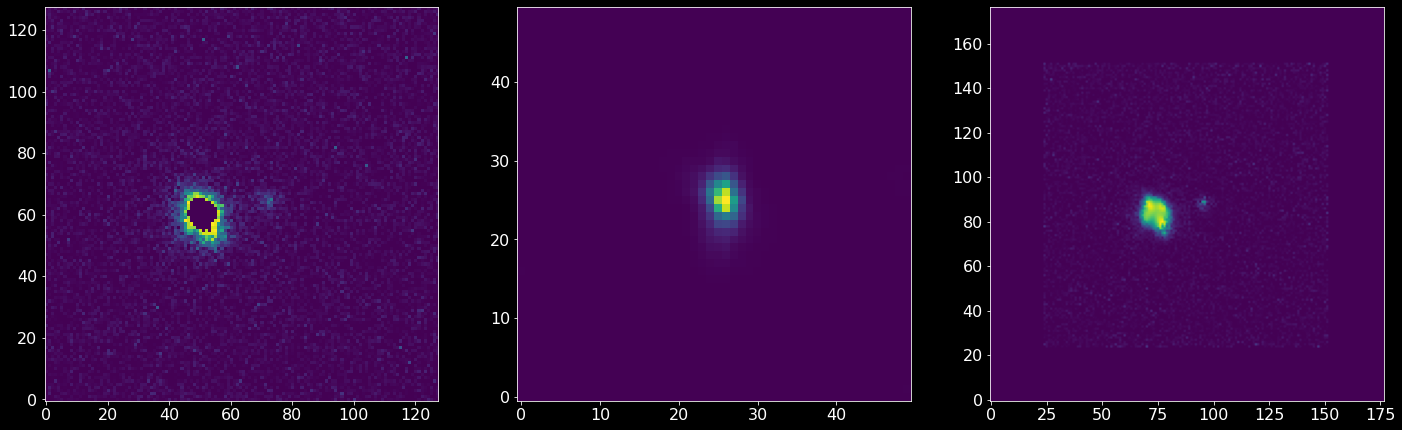

 25%|██▌       | 5/20 [00:05<00:17,  1.17s/it]

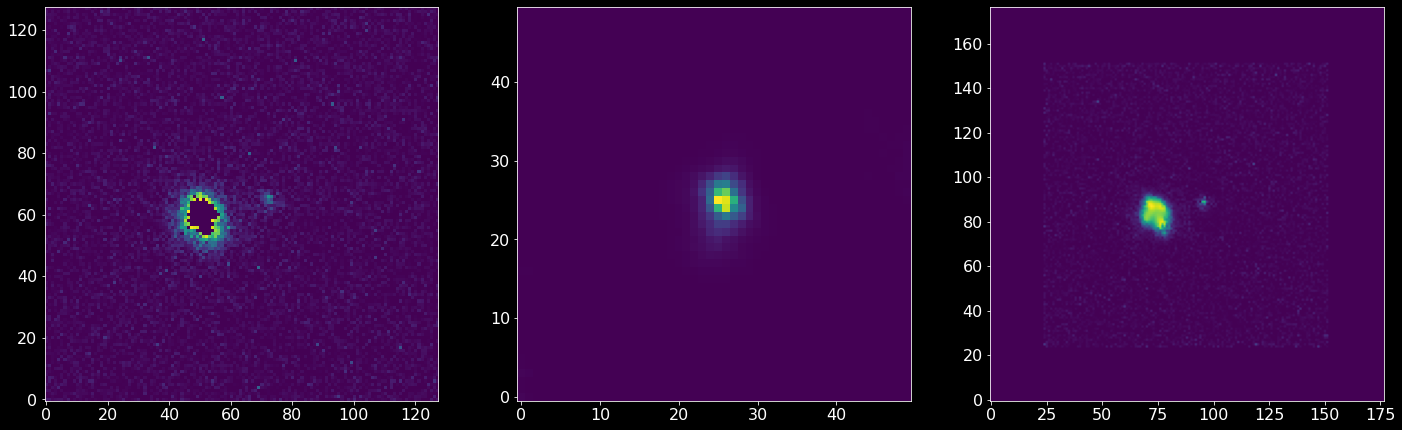

 30%|███       | 6/20 [00:06<00:16,  1.17s/it]

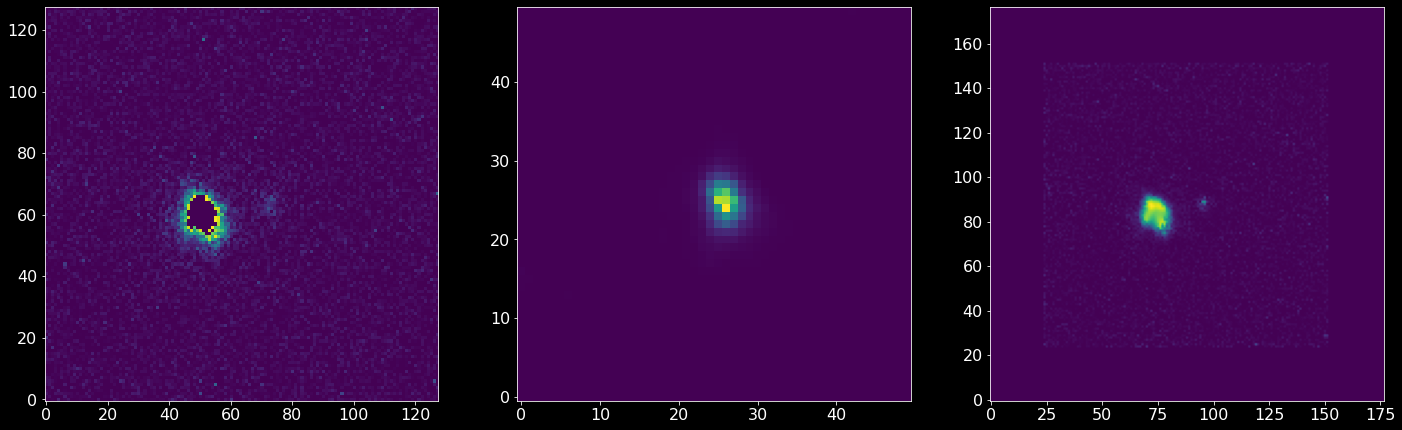

 35%|███▌      | 7/20 [00:07<00:15,  1.20s/it]

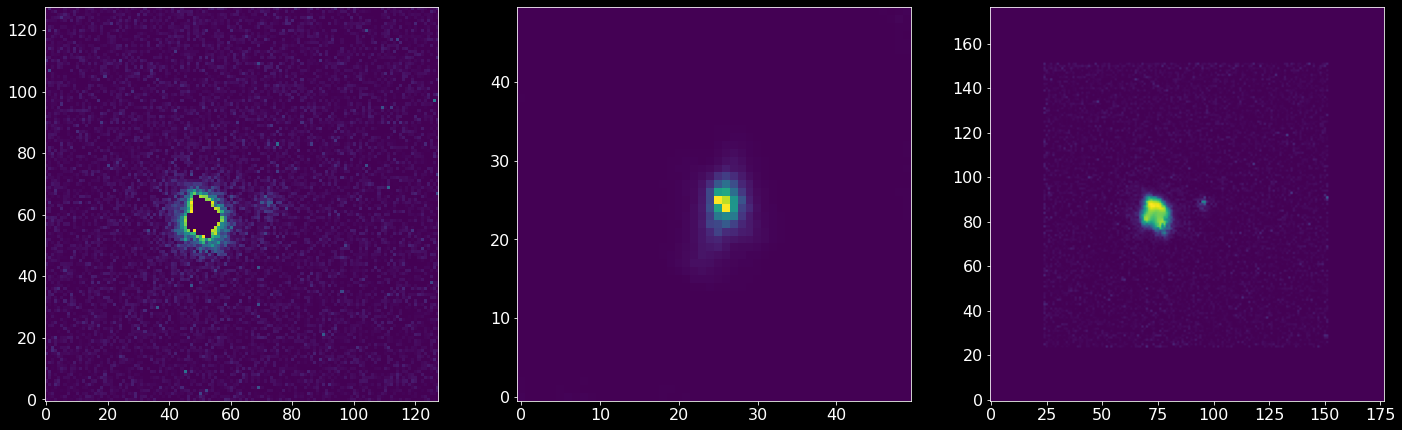

 40%|████      | 8/20 [00:09<00:14,  1.21s/it]

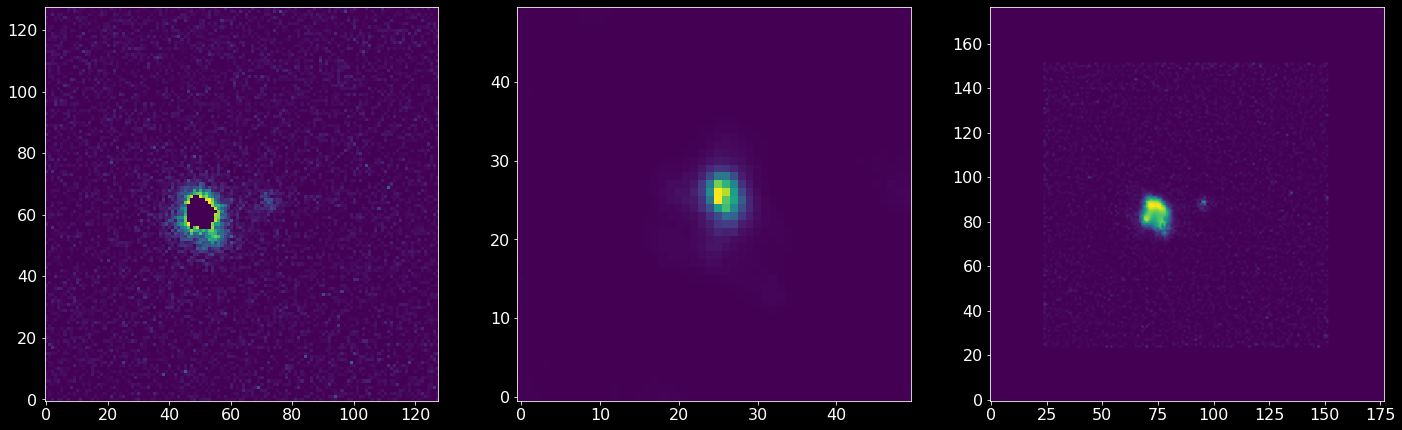

 45%|████▌     | 9/20 [00:10<00:13,  1.20s/it]

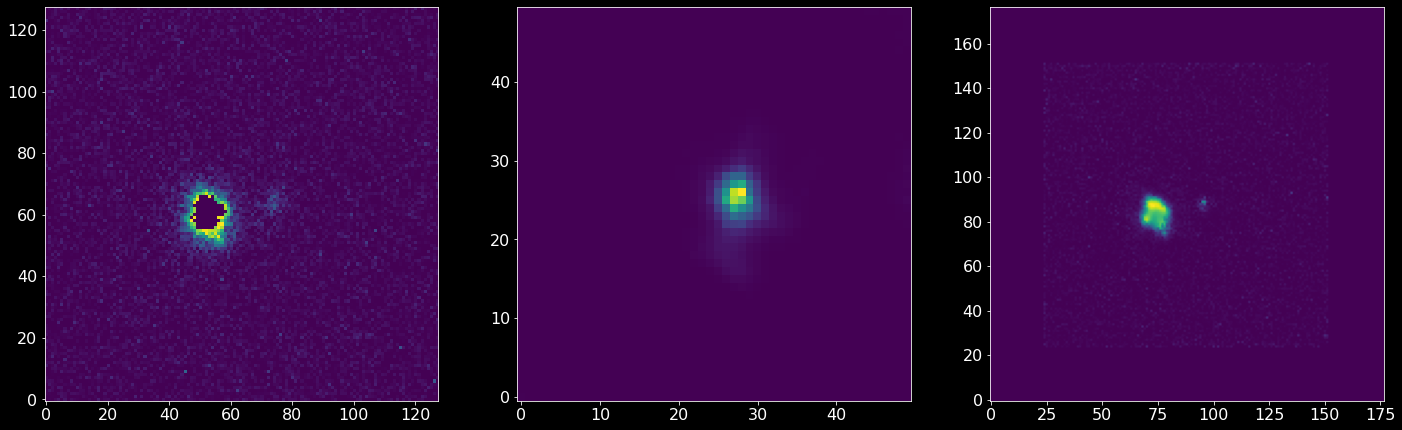

 50%|█████     | 10/20 [00:11<00:12,  1.20s/it]

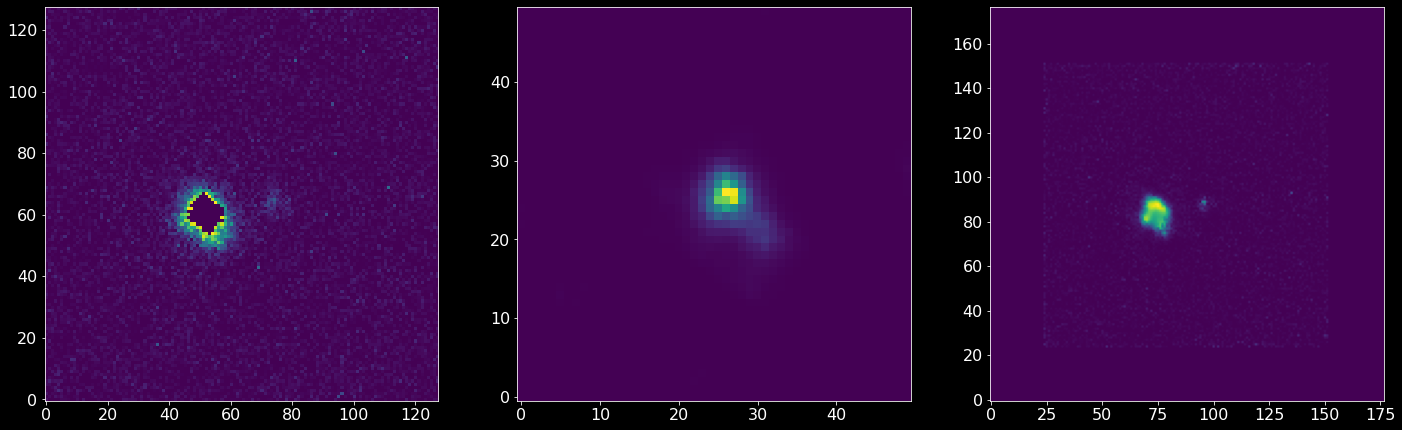

 55%|█████▌    | 11/20 [00:12<00:11,  1.25s/it]

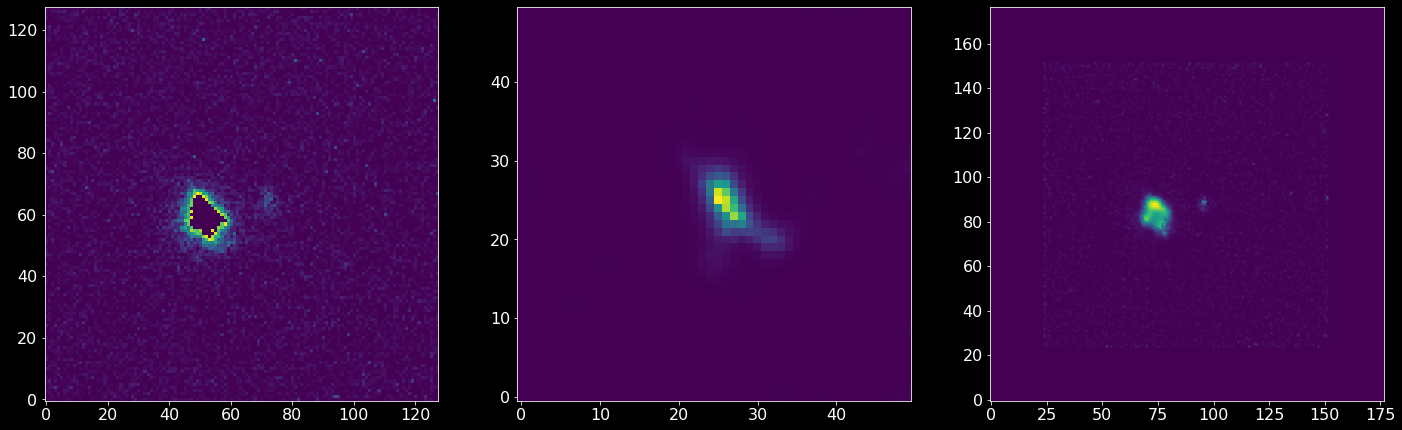

 60%|██████    | 12/20 [00:14<00:09,  1.24s/it]

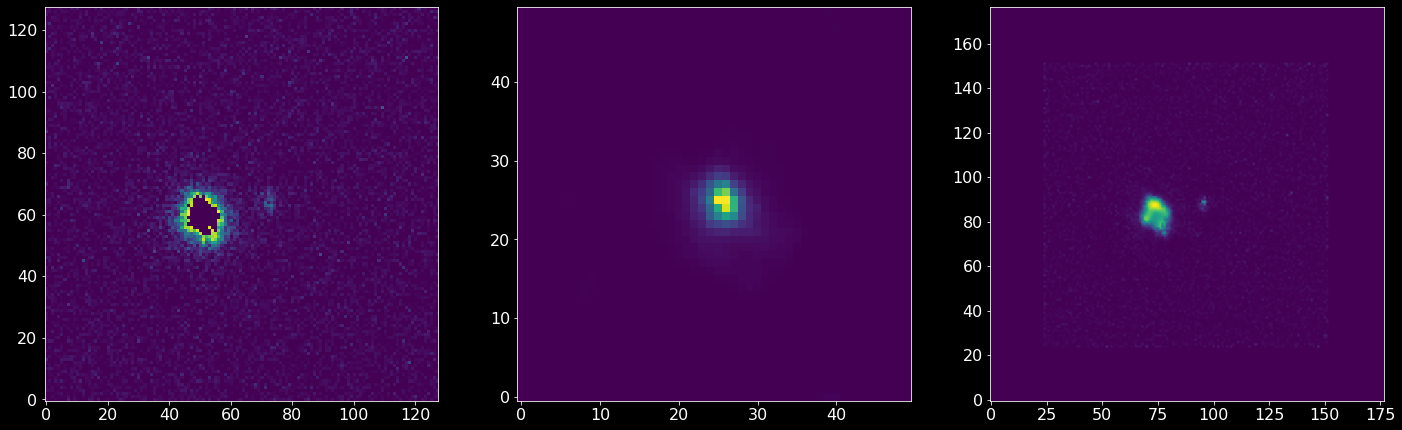

 65%|██████▌   | 13/20 [00:15<00:08,  1.23s/it]

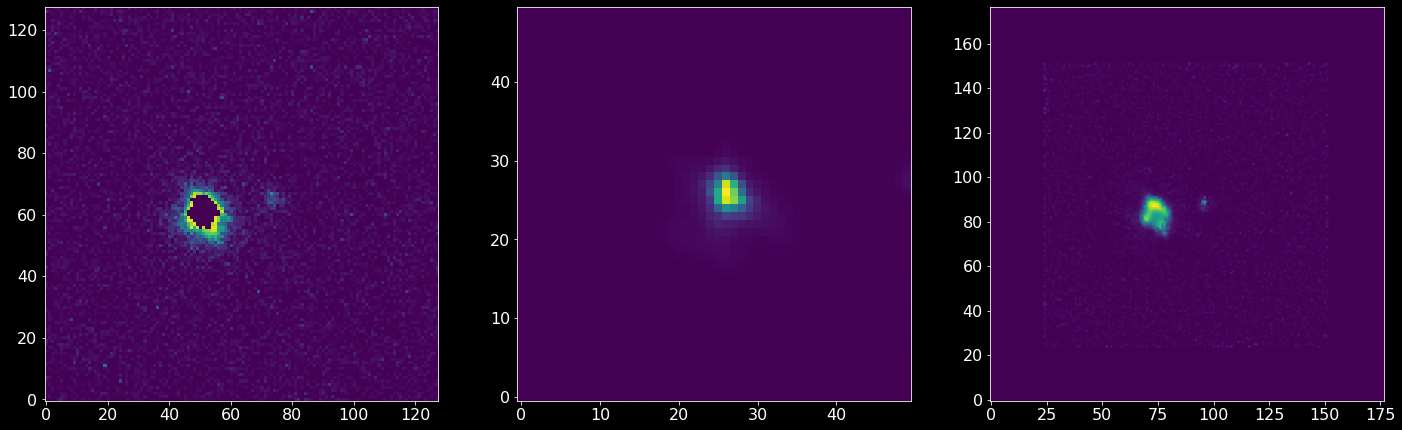

 70%|███████   | 14/20 [00:16<00:07,  1.22s/it]

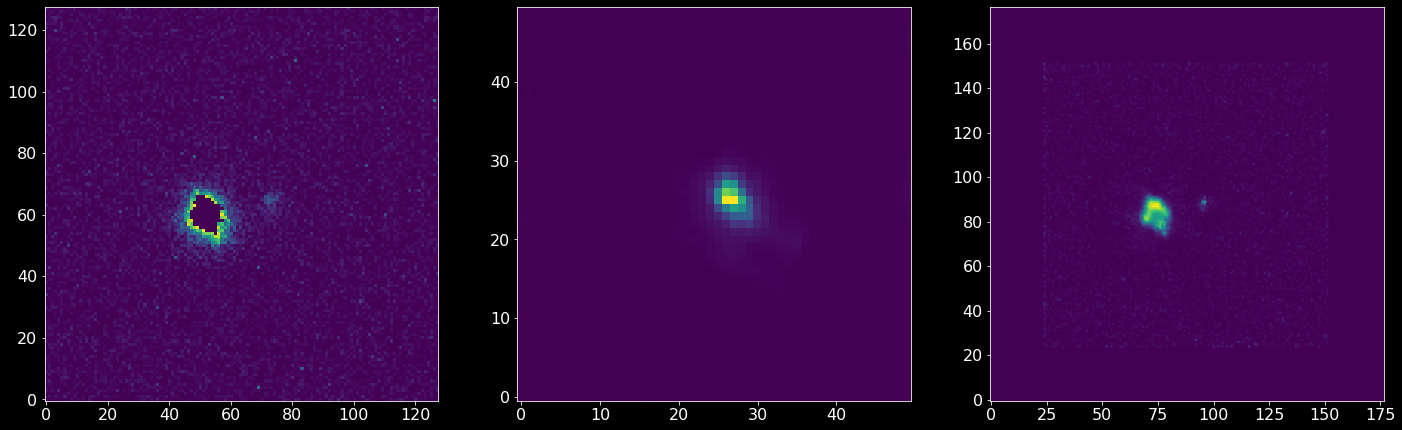

 75%|███████▌  | 15/20 [00:17<00:06,  1.21s/it]

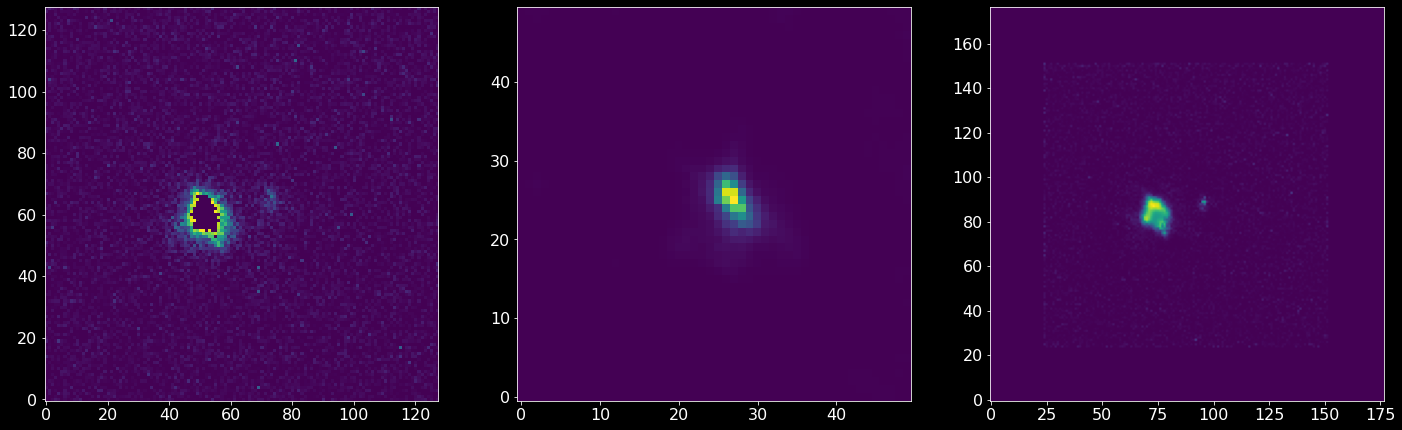

 80%|████████  | 16/20 [00:18<00:04,  1.20s/it]

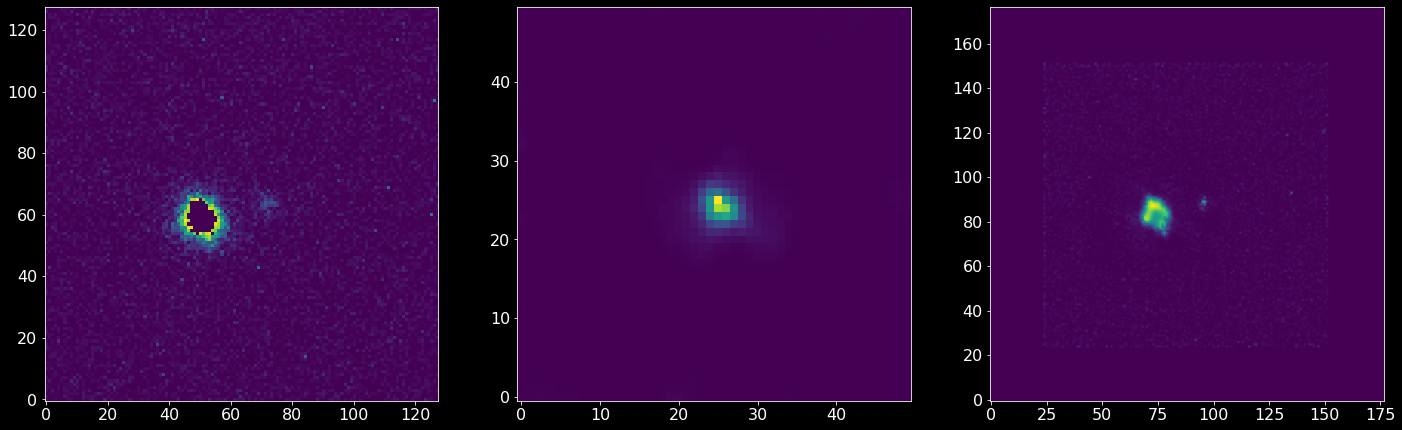

 85%|████████▌ | 17/20 [00:20<00:03,  1.20s/it]

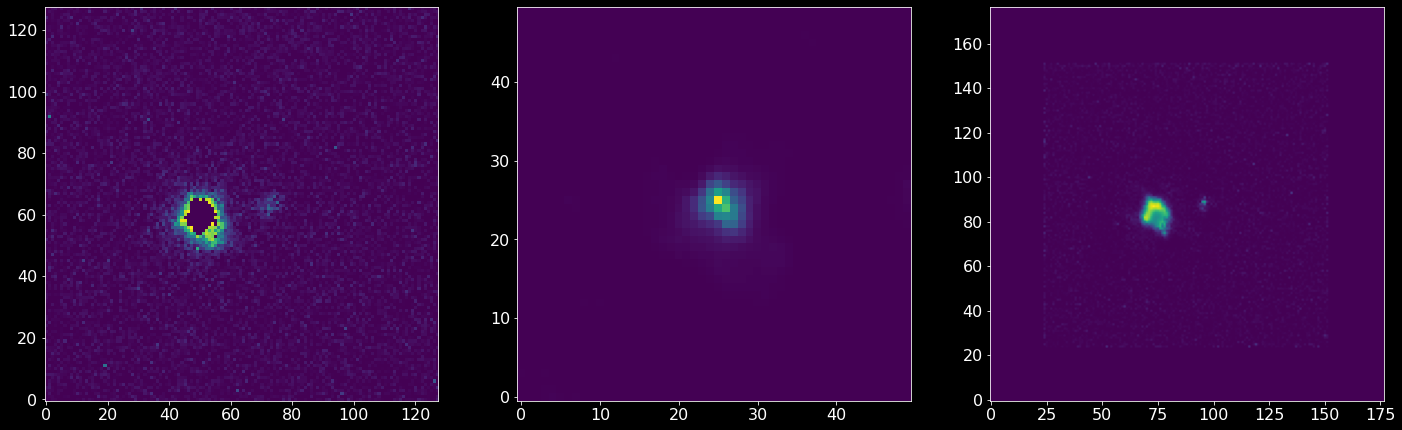

 90%|█████████ | 18/20 [00:21<00:02,  1.23s/it]

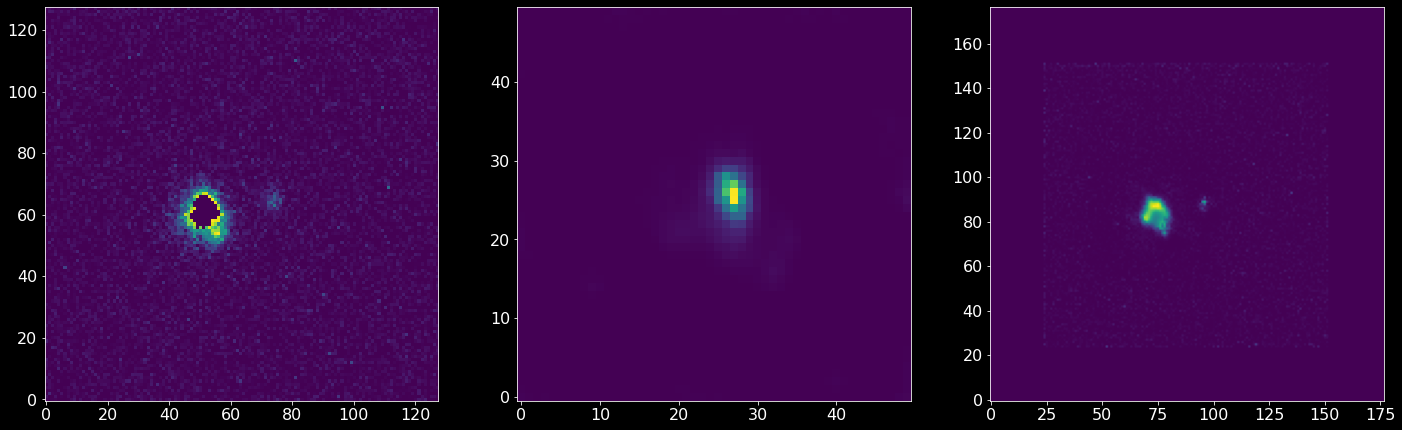

 95%|█████████▌| 19/20 [00:22<00:01,  1.29s/it]

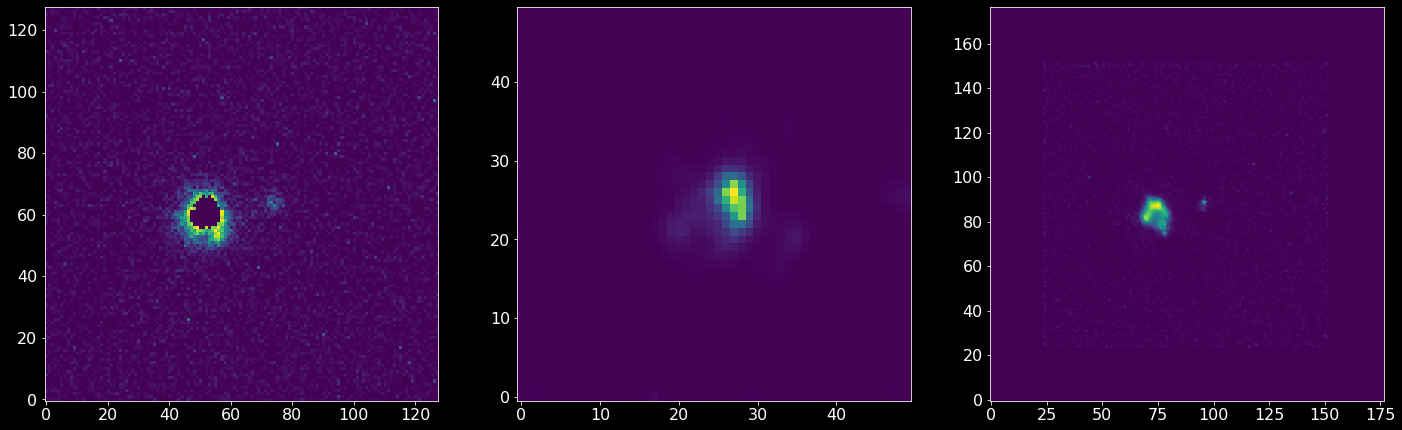

100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


In [92]:
## parameters
sf = np.array([50, 50])       # size of the PSF
maxiter = [40, 1]    # number of iterations for f and x
n = 20              # number of images
clipping = np.inf      # maximally acceptable pixel (for saturation correction)
srf = 1.0           # superresolution factor

base = '/Users/saydjari/Dropbox/GradSchool_AKS/Doug/ExtData/HOP/2021_02_25/'
directory = 'TIC_72090501.01/2021-02-26_00_56_38Z/'

# intially there is no x
flux_x = []
flux_y = []
flux_f = []
x = np.array([])
for j in tqdm(range(0,n)):
    y = debayer(base+directory+'2021-02-26-0056_6-CapObj_{:0>4d}.FIT'.format(j))[:,:,1]
    x, f = obd(x, y, sf, maxiter,65500)
    fig, ax = plt.subplots(1,3, figsize=(24., 8.))
    ax[0].imshow(y, origin='lower')
    ax[1].imshow(f, origin='lower')
    ax[2].imshow(x, origin='lower')
    plt.show()
    flux_x.append(np.sum(x))
    flux_f.append(np.sum(f))
    flux_y.append(np.sum(y))
    
# sumy = np.mean(flux_y)
# sumx = np.mean(x)
# x = sumy/sumx*x

# fig, ax = plt.subplots(1,3, figsize=(24., 8.))
# ax[0].imshow(y, origin='lower')
# ax[1].imshow(f, origin='lower')
# ax[2].imshow(x, origin='lower')
# plt.show()

100%|██████████| 100/100 [01:28<00:00,  1.13it/s]


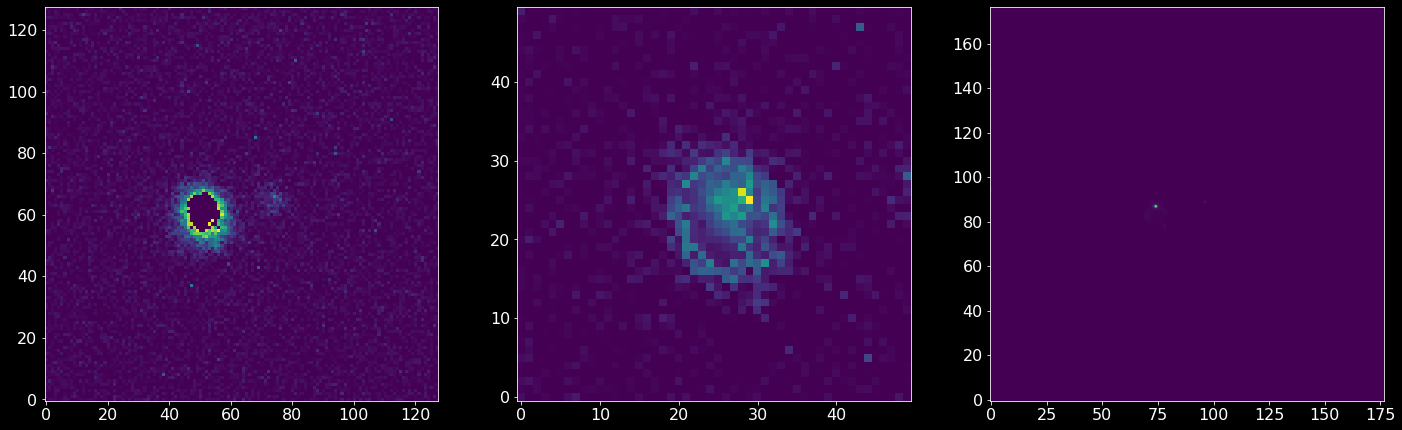

In [93]:
## parameters
sf = np.array([50, 50])       # size of the PSF
maxiter = [40, 1]    # number of iterations for f and x
n = 100              # number of images
clipping = np.inf      # maximally acceptable pixel (for saturation correction)
srf = 1.0           # superresolution factor

base = '/Users/saydjari/Dropbox/GradSchool_AKS/Doug/ExtData/HOP/2021_02_25/'
directory = 'TIC_72090501.01/2021-02-26_00_56_38Z/'

# intially there is no x
flux_x = []
flux_y = []
flux_f = []
x = np.array([])
for j in tqdm(range(0,n)):
    y = debayer(base+directory+'2021-02-26-0056_6-CapObj_{:0>4d}.FIT'.format(j))[:,:,1]
    x, f = obd(x, y, sf, maxiter,65500)
#     fig, ax = plt.subplots(1,3, figsize=(24., 8.))
#     ax[0].imshow(y, origin='lower')
#     ax[1].imshow(f, origin='lower')
#     ax[2].imshow(x, origin='lower')
#     plt.show()
    flux_x.append(np.sum(x))
    flux_f.append(np.sum(f))
    flux_y.append(np.sum(y))
    
sumy = np.mean(flux_y)
sumx = np.mean(x)
x = sumy/sumx*x

fig, ax = plt.subplots(1,3, figsize=(24., 8.))
ax[0].imshow(y, origin='lower')
ax[1].imshow(f, origin='lower')
ax[2].imshow(x, origin='lower')
plt.show()

[]

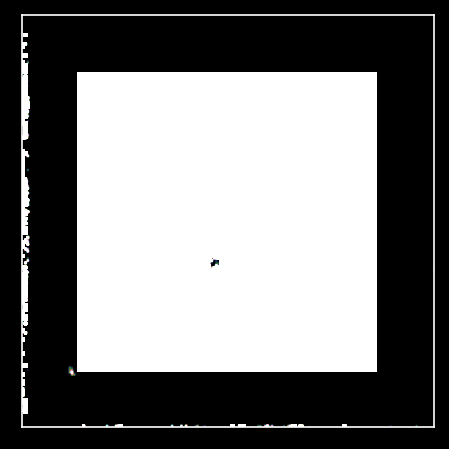

In [118]:
fig = plt.figure(figsize=(8,8),dpi=150)

ax = fig.add_subplot(2,2,1)
im = plt.imshow(x,
                cmap='cubehelix',
                vmin=.1,
                vmax=1,
                origin='lower'
               )
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])

<ipython-input-135-6b411e663d9c>:4: RuntimeWarning: divide by zero encountered in log10
  im = plt.imshow(np.log10(x),


[]

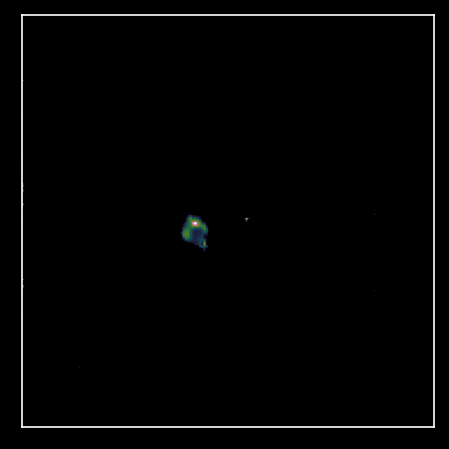

In [135]:
fig = plt.figure(figsize=(8,8),dpi=150)

ax = fig.add_subplot(2,2,1)
im = plt.imshow(np.log10(x),
                cmap='cubehelix',
                vmin=8.5,
                vmax=11,
                origin='lower'
               )
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])

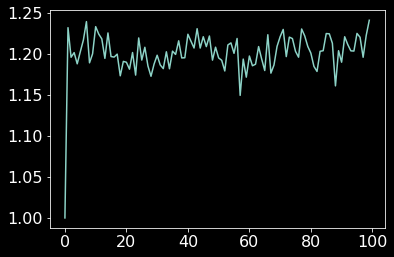

In [137]:
plt.plot(np.array(flux_x)/np.array(flux_y))

In [140]:
1.2**100

82817974.52201425

In [145]:
np.sum(x/(1.19**99))

28254.47277771834

100%|██████████| 100/100 [01:31<00:00,  1.09it/s]


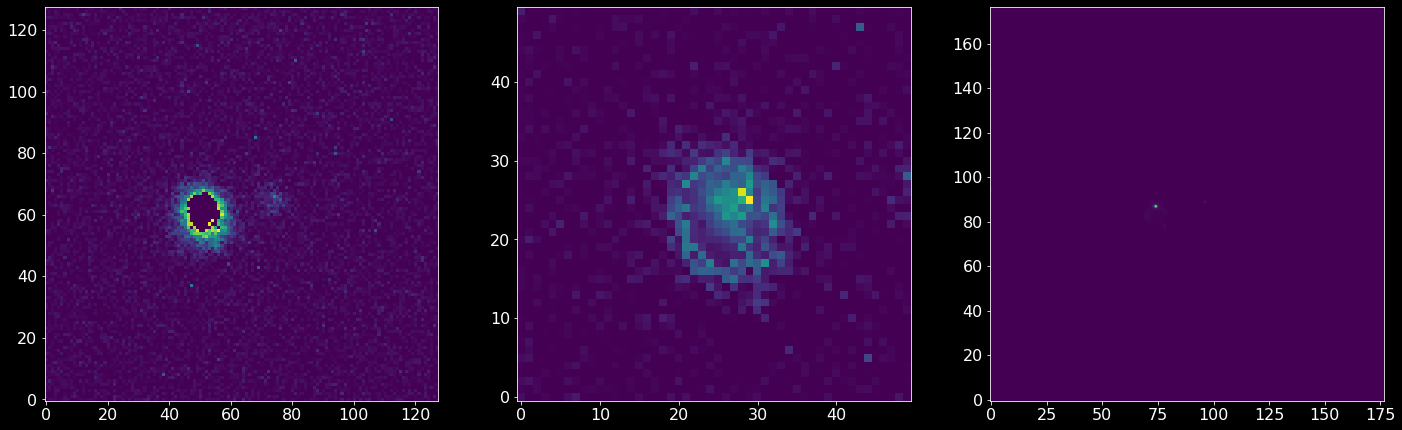

In [146]:
## parameters
sf = np.array([50, 50])       # size of the PSF
maxiter = [40, 1]    # number of iterations for f and x
n = 100              # number of images
clipping = np.inf      # maximally acceptable pixel (for saturation correction)
srf = 1.0           # superresolution factor

base = '/Users/saydjari/Dropbox/GradSchool_AKS/Doug/ExtData/HOP/2021_02_25/'
directory = 'TIC_72090501.01/2021-02-26_00_56_38Z/'

# intially there is no x
flux_x = []
flux_y = []
flux_f = []
x = np.array([])
for j in tqdm(range(0,n)):
    y = debayer(base+directory+'2021-02-26-0056_6-CapObj_{:0>4d}.FIT'.format(j))[:,:,1]
    flux_y.append(np.sum(y))
    x, f = obd(x, y, sf, maxiter,65500)
#     fig, ax = plt.subplots(1,3, figsize=(24., 8.))
#     ax[0].imshow(y, origin='lower')
#     ax[1].imshow(f, origin='lower')
#     ax[2].imshow(x, origin='lower')
#     plt.show()
    flux_x.append(np.sum(x))
    flux_f.append(np.sum(f))
    
# sumy = np.mean(flux_y)
# sumx = np.mean(x)
# x = sumy/sumx*x

fig, ax = plt.subplots(1,3, figsize=(24., 8.))
ax[0].imshow(y, origin='lower')
ax[1].imshow(f, origin='lower')
ax[2].imshow(x, origin='lower')
plt.show()

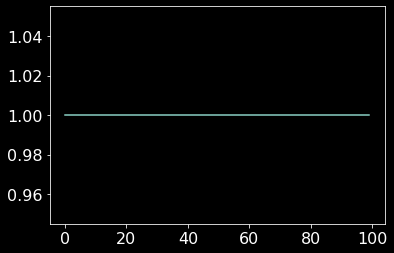

In [147]:
plt.plot(np.array(flux_x)/np.array(flux_y))

<ipython-input-158-50c2c735d5bf>:4: RuntimeWarning: divide by zero encountered in log10
  im = plt.imshow(np.log10(x),


[]

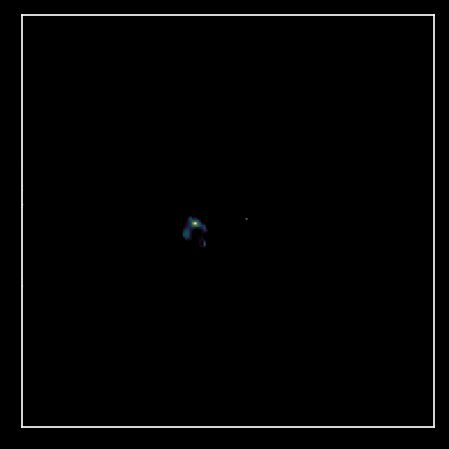

In [158]:
fig = plt.figure(figsize=(8,8),dpi=150)

ax = fig.add_subplot(2,2,1)
im = plt.imshow(np.log10(x),
                cmap='cubehelix',
                vmin=4.5,
                vmax=7,
                origin='lower'
               )
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])